# Engenharia de caracteristicas

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time

In [2]:
dataset = pd.read_csv('NIPS_1987-2015_transpose.csv')
dataset.head(5)

,Unnamed: 0,abalone,abbeel,abbott,abbreviate,abbreviated,abc,abeles,abernethy,abilistic,...,zhou,zhu,zien,zilberstein,zones,zoo,zoom,zou,zoubin,zurich
0,1987_1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1987_2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1987_3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1987_4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1987_5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
max_feature_counts = dataset.max()
max_feature_counts = max_feature_counts[1:] # Retirando a coluna Xyear_ID

## Histograma de maximos

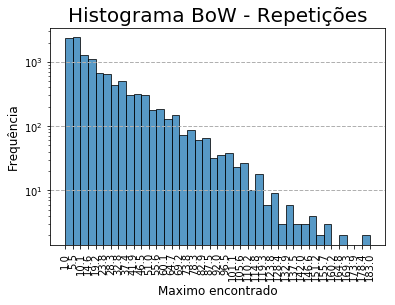

[  2.32400000e+03   2.40300000e+03   1.28500000e+03   1.09700000e+03
   6.73000000e+02   6.58000000e+02   4.45000000e+02   5.01000000e+02
   3.09000000e+02   3.13000000e+02   3.00000000e+02   1.81000000e+02
   1.84000000e+02   1.29000000e+02   1.49000000e+02   7.40000000e+01
   8.60000000e+01   6.10000000e+01   6.50000000e+01   3.20000000e+01
   3.50000000e+01   3.80000000e+01   2.30000000e+01   2.70000000e+01
   1.00000000e+01   1.80000000e+01   6.00000000e+00   9.00000000e+00
   3.00000000e+00   6.00000000e+00   3.00000000e+00   3.00000000e+00
   4.00000000e+00   2.00000000e+00   3.00000000e+00   0.00000000e+00
   2.00000000e+00   0.00000000e+00   0.00000000e+00   2.00000000e+00] [   1.      5.55   10.1    14.65   19.2    23.75   28.3    32.85   37.4
   41.95   46.5    51.05   55.6    60.15   64.7    69.25   73.8    78.35
   82.9    87.45   92.     96.55  101.1   105.65  110.2   114.75  119.3
  123.85  128.4   132.95  137.5   142.05  146.6   151.15  155.7   160.25
  164.8   169.35  1

In [5]:
n, bins, patches = plt.hist(max_feature_counts, 40, log=True, ec='black', alpha=0.75, align='mid')
plt.title('Histograma BoW - Repetições', fontsize=20)
plt.xlabel('Maximo encontrado', fontsize=12)
plt.xticks(bins, rotation=90)
plt.ylabel('Frequência', fontsize=12)
ax = plt.gca()
ax.grid(axis='y', linestyle='--', linewidth=1)
plt.show()
plt.close()
print(n, bins)

## Estudo dos termos frequentes

In [4]:
sorted_values = max_feature_counts.sort_values(ascending=False)
sorted_columns = sorted_values.axes[0]

In [5]:
for index, s in enumerate(sorted_columns):
    count_raw = np.array(dataset.loc[:, s])
    non_zeros = np.sort([t for t in count_raw if t != 0])
    zeros = [t for t in count_raw if t == 0]
    
    print('%s - %0.f\t%0.f - %0.f - %0.f\t%0.f - %0.f' % (s, 
                                                 sorted_values[index], 
                                                 np.median(non_zeros), 
                                                 np.mean(non_zeros),
                                                 np.sum(non_zeros),
                                                 len(non_zeros),
                                                 len(zeros)))

reward - 183	7 - 12 - 6530	523 - 5288
choice - 180	1 - 2 - 6179	2617 - 3194
gaze - 168	3 - 11 - 612	58 - 5753
clustering - 167	2 - 9 - 10354	1197 - 4614
shape - 160	1 - 4 - 4009	1113 - 4698
noise - 159	3 - 7 - 17104	2564 - 3247
risk - 156	2 - 7 - 5659	826 - 4985
tensor - 155	2 - 11 - 2803	252 - 5559
matrix - 153	5 - 10 - 31721	3283 - 2528
tree - 151	3 - 10 - 10908	1140 - 4671
data - 150	10 - 14 - 72295	5022 - 789
norm - 149	2 - 6 - 8893	1548 - 4263
policy - 148	11 - 19 - 10811	563 - 5248
model - 144	10 - 16 - 80080	4909 - 902
kernel - 144	4 - 11 - 18411	1626 - 4185
survival - 143	1 - 4 - 349	79 - 5732
map - 142	2 - 5 - 8973	1803 - 4008
chain - 141	2 - 4 - 3932	980 - 4831
learning - 141	10 - 15 - 76406	5058 - 753
scene - 137	2 - 5 - 3016	610 - 5201
lambda - 136	2 - 8 - 595	75 - 5736
reference - 134	1 - 3 - 1962	779 - 5032
teaching - 134	1 - 5 - 424	88 - 5723
saliency - 133	4 - 13 - 1347	104 - 5707
top - 133	2 - 3 - 6737	2183 - 3628
causal - 132	2 - 8 - 2170	271 - 5540
domains - 132	1 - 

cell - 83	2 - 6 - 5462	904 - 4907
pgpe - 83	42 - 42 - 85	2 - 5809
method - 83	4 - 7 - 27974	4277 - 1534
verification - 83	1 - 4 - 460	126 - 5685
semantic - 83	2 - 5 - 2289	451 - 5360
resolution - 83	1 - 3 - 2351	719 - 5092
knowledge - 83	1 - 2 - 6229	2577 - 3234
topics - 83	1 - 7 - 2904	409 - 5402
game - 83	2 - 9 - 3161	368 - 5443
channel - 83	2 - 4 - 2069	474 - 5337
sampler - 83	3 - 6 - 1737	303 - 5508
phase - 83	2 - 4 - 5371	1208 - 4603
instance - 83	2 - 3 - 6185	2032 - 3779
window - 83	2 - 3 - 2336	703 - 5108
reservoir - 82	1 - 10 - 257	25 - 5786
max - 82	2 - 4 - 8107	2131 - 3680
auditing - 82	82 - 82 - 82	1 - 5810
deep - 82	2 - 7 - 3720	514 - 5297
valued - 82	1 - 2 - 2648	1191 - 4620
estimator - 82	2 - 6 - 5491	965 - 4846
class - 82	3 - 6 - 17570	3121 - 2690
noisy - 82	2 - 3 - 4238	1491 - 4320
discount - 82	1 - 2 - 605	278 - 5533
attractiveness - 82	1 - 7 - 96	13 - 5798
sample - 82	3 - 5 - 15845	2956 - 2855
adaboost - 81	3 - 8 - 1199	159 - 5652
singular - 81	2 - 3 - 2001	589 - 5222

actions - 69	3 - 6 - 4975	771 - 5040
orrent - 69	69 - 69 - 69	1 - 5810
alternatives - 69	1 - 2 - 739	370 - 5441
visual - 69	3 - 6 - 9372	1504 - 4307
conv - 69	3 - 8 - 420	51 - 5760
load - 69	1 - 4 - 674	186 - 5625
canonical - 68	1 - 3 - 1185	456 - 5355
frequency - 68	2 - 4 - 5365	1291 - 4520
symmetry - 68	1 - 2 - 1018	468 - 5343
radar - 68	1 - 5 - 301	62 - 5749
variables - 68	3 - 6 - 17022	3062 - 2749
types - 68	1 - 2 - 3991	1843 - 3968
shareboost - 68	68 - 68 - 68	1 - 5810
smc - 68	1 - 6 - 533	88 - 5723
sleec - 68	68 - 68 - 68	1 - 5810
calibration - 68	1 - 5 - 626	132 - 5679
similarity - 68	2 - 5 - 5081	1124 - 4687
parallel - 68	1 - 3 - 4263	1418 - 4393
graphs - 68	2 - 5 - 5259	1017 - 4794
contrast - 68	1 - 2 - 5157	2385 - 3426
style - 68	1 - 2 - 812	389 - 5422
stel - 68	2 - 24 - 71	3 - 5808
queries - 68	2 - 6 - 2072	350 - 5461
categories - 68	1 - 3 - 2508	717 - 5094
concord - 68	1 - 18 - 71	4 - 5807
unseen - 68	1 - 2 - 640	327 - 5484
finger - 68	2 - 6 - 351	56 - 5755
ancestor - 68	2 

ground - 61	2 - 3 - 2845	859 - 4952
neighbors - 61	2 - 3 - 2265	694 - 5117
tuning - 61	1 - 3 - 2746	880 - 4931
motions - 61	2 - 3 - 506	145 - 5666
inputs - 61	2 - 4 - 6844	1821 - 3990
reinforcement - 61	4 - 7 - 3897	590 - 5221
divergence - 61	2 - 4 - 3299	819 - 4992
relevant - 61	1 - 2 - 3441	1656 - 4155
disk - 61	1 - 3 - 214	82 - 5729
concept - 61	1 - 2 - 2137	867 - 4944
generalization - 61	2 - 4 - 7068	1978 - 3833
adaptive - 60	1 - 3 - 5298	1640 - 4171
low - 60	2 - 4 - 11168	3180 - 2631
sgns - 60	2 - 14 - 70	5 - 5806
centers - 60	1 - 3 - 1150	408 - 5403
hogwild - 60	1 - 5 - 132	28 - 5783
monte - 60	2 - 4 - 2925	835 - 4976
fab - 60	1 - 7 - 92	13 - 5798
shot - 60	1 - 4 - 569	153 - 5658
sets - 60	2 - 4 - 11834	3198 - 2613
center - 60	1 - 2 - 4338	1737 - 4074
accuracy - 60	2 - 4 - 9275	2203 - 3608
blocks - 60	1 - 3 - 2013	643 - 5168
case - 60	4 - 5 - 26012	5014 - 797
sghmc - 60	21 - 31 - 154	5 - 5806
pseudo - 60	1 - 3 - 1779	626 - 5185
charge - 60	1 - 4 - 400	111 - 5700
subspaces - 60	1 

std - 54	2 - 4 - 491	140 - 5671
sinr - 54	1 - 12 - 59	5 - 5806
recognition - 54	2 - 5 - 10640	2122 - 3689
statistical - 54	2 - 3 - 9983	3123 - 2688
filters - 54	2 - 5 - 3214	652 - 5159
periodic - 54	1 - 3 - 642	235 - 5576
slam - 54	1 - 7 - 67	9 - 5802
performance - 54	4 - 6 - 24333	4311 - 1500
logical - 54	1 - 2 - 634	262 - 5549
pattern - 54	2 - 3 - 8773	2550 - 3261
moment - 54	1 - 2 - 1071	471 - 5340
blind - 54	2 - 4 - 1026	237 - 5574
dimensions - 54	1 - 3 - 3968	1522 - 4289
patterns - 54	2 - 4 - 6854	1587 - 4224
ppca - 54	3 - 9 - 233	27 - 5784
column - 54	2 - 3 - 4302	1523 - 4288
poss - 54	1 - 19 - 56	3 - 5808
beta - 54	2 - 4 - 944	241 - 5570
relational - 54	2 - 6 - 1158	193 - 5618
predictions - 54	2 - 3 - 4205	1309 - 4502
spn - 54	45 - 34 - 101	3 - 5808
brief - 54	1 - 1 - 612	480 - 5331
rates - 54	2 - 3 - 5731	1735 - 4076
quantization - 54	1 - 4 - 927	258 - 5553
covariate - 54	1 - 3 - 383	132 - 5679
sklearn - 54	28 - 28 - 55	2 - 5809
deadline - 54	2 - 9 - 124	14 - 5797
arbors - 54	1

transformer - 50	2 - 11 - 64	6 - 5805
memristive - 50	26 - 26 - 51	2 - 5809
greedi - 50	26 - 26 - 52	2 - 5809
shading - 50	1 - 4 - 346	90 - 5721
familiarity - 50	1 - 5 - 167	34 - 5777
typing - 50	1 - 5 - 62	12 - 5799
form - 50	3 - 3 - 15063	4508 - 1303
anomaly - 50	2 - 7 - 399	58 - 5753
mrf - 50	3 - 7 - 1057	157 - 5654
budget - 50	2 - 5 - 938	204 - 5607
community - 50	1 - 2 - 1126	598 - 5213
codon - 50	6 - 16 - 63	4 - 5807
mips - 50	1 - 5 - 91	17 - 5794
mpmc - 50	29 - 29 - 58	2 - 5809
managers - 50	1 - 7 - 73	10 - 5801
making - 50	1 - 2 - 3917	2130 - 3681
schmidt - 50	1 - 2 - 457	212 - 5599
double - 50	1 - 2 - 847	425 - 5386
labeling - 50	2 - 4 - 2050	542 - 5269
pomdp - 50	4 - 10 - 942	99 - 5712
foraging - 50	1 - 5 - 117	23 - 5788
wire - 50	1 - 3 - 214	65 - 5746
permutahedron - 50	12 - 19 - 75	4 - 5807
permitted - 50	1 - 2 - 216	90 - 5721
descent - 50	2 - 4 - 5097	1340 - 4471
registration - 50	1 - 4 - 352	98 - 5713
text - 50	1 - 3 - 3418	1174 - 4637
pathway - 50	1 - 4 - 573	155 - 5656


pages - 45	3 - 4 - 12390	2930 - 2881
device - 45	1 - 3 - 673	265 - 5546
senses - 45	1 - 2 - 180	75 - 5736
tuned - 45	1 - 2 - 1478	749 - 5062
receptor - 45	2 - 4 - 463	103 - 5708
normalization - 45	1 - 2 - 2034	959 - 4852
anomalies - 45	2 - 7 - 202	31 - 5780
perturbation - 45	1 - 3 - 1121	334 - 5477
keypoint - 45	2 - 5 - 73	14 - 5797
imaging - 45	1 - 3 - 1070	404 - 5407
tokens - 45	2 - 4 - 463	129 - 5682
projection - 45	2 - 4 - 4459	1163 - 4648
operators - 45	1 - 3 - 1146	391 - 5420
ode - 45	1 - 4 - 157	35 - 5776
subgraph - 45	2 - 4 - 498	138 - 5673
solutions - 45	1 - 3 - 4473	1706 - 4105
diffusion - 45	2 - 5 - 1476	269 - 5542
force - 45	1 - 2 - 1131	613 - 5198
eus - 45	1 - 10 - 51	5 - 5806
prototypes - 45	1 - 5 - 457	96 - 5715
equivalence - 45	1 - 3 - 1295	497 - 5314
environment - 45	1 - 3 - 2908	847 - 4964
recursive - 45	1 - 3 - 1417	517 - 5294
inequalities - 45	1 - 2 - 927	474 - 5337
super - 45	1 - 3 - 887	306 - 5505
bipartite - 45	2 - 5 - 849	188 - 5623
meta - 45	1 - 4 - 648	182 - 5

noun - 41	2 - 3 - 235	68 - 5743
policies - 41	3 - 6 - 2556	413 - 5398
cuts - 41	1 - 3 - 795	266 - 5545
minima - 41	1 - 2 - 1201	543 - 5268
heuristic - 41	1 - 2 - 1803	792 - 5019
diamond - 41	1 - 2 - 99	42 - 5769
transparency - 41	1 - 3 - 104	33 - 5778
concert - 41	1 - 2 - 77	32 - 5779
intelligibility - 41	2 - 6 - 84	14 - 5797
factored - 41	1 - 3 - 660	206 - 5605
shaping - 41	1 - 4 - 332	76 - 5735
pbayes - 41	28 - 28 - 55	2 - 5809
irrelevant - 41	1 - 2 - 825	461 - 5350
dyads - 41	3 - 8 - 79	10 - 5801
transformations - 41	1 - 3 - 1695	549 - 5262
proj - 41	1 - 4 - 110	27 - 5784
machines - 41	2 - 3 - 3607	1271 - 4540
inequality - 41	2 - 3 - 3067	1070 - 4741
scores - 41	2 - 3 - 2325	697 - 5114
ant - 41	1 - 2 - 126	55 - 5756
scheme - 41	2 - 3 - 4235	1630 - 4181
markets - 41	1 - 4 - 249	60 - 5751
firl - 41	8 - 15 - 59	4 - 5807
judgments - 41	2 - 4 - 392	99 - 5712
ratio - 41	1 - 3 - 3919	1493 - 4318
epoch - 41	2 - 4 - 882	229 - 5582
exchangeable - 41	2 - 4 - 363	103 - 5708
false - 41	2 - 4 - 2

probabilistic - 38	2 - 3 - 6610	1975 - 3836
constant - 38	2 - 3 - 10373	3453 - 2358
distractor - 38	2 - 6 - 302	47 - 5764
database - 38	2 - 3 - 2682	934 - 4877
romma - 38	3 - 13 - 91	7 - 5804
diabetes - 38	1 - 2 - 161	73 - 5738
weighting - 38	1 - 2 - 1448	590 - 5221
poker - 38	4 - 10 - 173	17 - 5794
monitoring - 37	1 - 2 - 439	194 - 5617
geodesic - 37	2 - 5 - 411	84 - 5727
association - 37	1 - 2 - 1716	854 - 4957
tuples - 37	1 - 2 - 283	118 - 5693
subtree - 37	2 - 4 - 534	135 - 5676
ref - 37	1 - 2 - 227	108 - 5703
dimensionality - 37	2 - 3 - 3943	1294 - 4517
colour - 37	1 - 2 - 144	66 - 5745
circuits - 37	2 - 3 - 1741	505 - 5306
collection - 37	1 - 2 - 2356	1185 - 4626
netw - 37	1 - 2 - 75	34 - 5777
listwise - 37	2 - 6 - 120	21 - 5790
schemas - 37	2 - 9 - 103	11 - 5800
bob - 37	1 - 3 - 155	45 - 5766
oblique - 37	1 - 4 - 118	31 - 5780
instruction - 37	1 - 4 - 257	63 - 5748
biclusters - 37	6 - 13 - 51	4 - 5807
cochlear - 37	2 - 6 - 274	44 - 5767
dueling - 37	4 - 9 - 63	7 - 5804
runtime -

suffix - 35	2 - 6 - 376	60 - 5751
kde - 35	5 - 7 - 314	42 - 5769
ultrametric - 35	1 - 6 - 54	9 - 5802
token - 35	2 - 4 - 351	92 - 5719
hermite - 35	1 - 3 - 80	27 - 5784
bounding - 35	1 - 3 - 1366	536 - 5275
dynamical - 35	2 - 3 - 2085	605 - 5206
effect - 35	1 - 2 - 5490	2347 - 3464
font - 35	1 - 2 - 113	52 - 5759
grams - 35	1 - 3 - 188	73 - 5738
cascades - 35	1 - 5 - 281	57 - 5754
syntactic - 35	1 - 3 - 430	132 - 5679
regulatory - 35	2 - 3 - 243	73 - 5738
infants - 35	2 - 4 - 146	41 - 5770
rcs - 35	4 - 8 - 81	10 - 5801
hyperplanes - 35	1 - 3 - 379	143 - 5668
regularized - 35	2 - 3 - 2977	867 - 4944
upper - 35	2 - 3 - 6356	2142 - 3669
hearing - 35	1 - 2 - 171	69 - 5742
rows - 35	1 - 3 - 2348	932 - 4879
grained - 35	1 - 2 - 259	136 - 5675
assignment - 35	2 - 4 - 2423	691 - 5120
duration - 35	1 - 2 - 966	420 - 5391
letters - 35	1 - 2 - 1362	677 - 5134
vocabularies - 35	1 - 3 - 155	56 - 5755
entropic - 35	1 - 3 - 236	74 - 5737
likely - 35	1 - 2 - 3437	1843 - 3968
train - 35	2 - 3 - 4509	15

array - 32	1 - 3 - 1323	473 - 5338
evolution - 32	1 - 2 - 1340	606 - 5205
erm - 32	3 - 5 - 352	66 - 5745
orthogonalization - 32	1 - 4 - 93	24 - 5787
asymptotic - 32	2 - 3 - 2520	820 - 4991
covariation - 32	1 - 3 - 60	21 - 5790
subsymbolic - 32	1 - 4 - 52	12 - 5799
dpi - 32	1 - 3 - 70	22 - 5789
agnostic - 32	1 - 3 - 466	147 - 5664
coordinates - 32	1 - 3 - 1832	687 - 5124
jordan - 32	1 - 2 - 2465	1321 - 4490
orders - 32	1 - 2 - 962	509 - 5302
perturbed - 32	1 - 3 - 567	220 - 5591
flight - 32	2 - 4 - 220	60 - 5751
fact - 32	2 - 2 - 7480	3470 - 2341
ams - 32	1 - 2 - 123	68 - 5743
spherically - 32	1 - 3 - 114	34 - 5777
birl - 32	29 - 29 - 58	2 - 5809
opponent - 32	2 - 5 - 394	86 - 5725
choices - 32	1 - 2 - 1628	991 - 4820
lancaster - 32	2 - 4 - 57	15 - 5796
returns - 32	1 - 2 - 1274	639 - 5172
meshes - 32	1 - 4 - 92	26 - 5785
psychophysical - 32	1 - 3 - 429	159 - 5652
phonetic - 32	2 - 4 - 432	105 - 5706
streaming - 32	2 - 5 - 477	102 - 5709
onset - 32	1 - 3 - 613	226 - 5585
owls - 32	2 - 7

preconditions - 30	1 - 3 - 62	20 - 5791
blurred - 30	1 - 2 - 180	82 - 5729
retraining - 30	1 - 2 - 189	83 - 5728
chord - 30	1 - 4 - 105	26 - 5785
branch - 30	1 - 3 - 715	250 - 5561
echo - 30	1 - 3 - 164	51 - 5760
alpha - 30	1 - 2 - 305	129 - 5682
rhythm - 30	2 - 4 - 241	62 - 5749
timescales - 30	1 - 3 - 119	45 - 5766
measurement - 30	1 - 3 - 1585	585 - 5226
clusterings - 30	1 - 3 - 297	90 - 5721
sdp - 30	3 - 6 - 561	101 - 5710
priority - 30	1 - 4 - 290	78 - 5733
sda - 30	4 - 9 - 62	7 - 5804
early - 30	1 - 2 - 2094	1106 - 4705
analytic - 30	1 - 2 - 838	408 - 5403
back - 30	1 - 2 - 3514	1631 - 4180
hot - 30	1 - 2 - 201	88 - 5723
instantiation - 30	1 - 2 - 297	129 - 5682
guidance - 30	1 - 2 - 229	137 - 5674
cpu - 30	1 - 3 - 918	359 - 5452
egocentric - 30	1 - 4 - 58	15 - 5796
preferred - 30	1 - 2 - 1062	477 - 5334
cold - 30	1 - 2 - 128	58 - 5753
spelling - 30	1 - 2 - 77	38 - 5773
suppose - 30	1 - 2 - 3561	1584 - 4227
completeness - 30	1 - 2 - 299	186 - 5625
arrays - 30	1 - 2 - 374	202 - 56

incentive - 27	1 - 3 - 177	55 - 5756
thinning - 27	1 - 3 - 94	29 - 5782
preserving - 27	1 - 2 - 780	377 - 5434
jeffreys - 27	2 - 3 - 118	37 - 5774
hough - 27	1 - 3 - 113	34 - 5777
rce - 27	1 - 8 - 60	8 - 5803
magnification - 27	1 - 4 - 89	25 - 5786
subclass - 27	1 - 2 - 170	94 - 5717
del - 27	1 - 2 - 148	77 - 5734
progressive - 27	1 - 2 - 120	65 - 5746
histories - 27	2 - 4 - 340	86 - 5725
proportion - 27	1 - 2 - 915	504 - 5307
wedge - 27	1 - 7 - 81	11 - 5800
programming - 27	2 - 3 - 4463	1491 - 4320
spgp - 27	16 - 17 - 101	6 - 5805
sta - 27	1 - 2 - 303	142 - 5669
tresp - 27	1 - 2 - 306	141 - 5670
translated - 27	1 - 2 - 355	227 - 5584
proc - 27	2 - 3 - 4708	1720 - 4091
mcc - 27	2 - 3 - 55	16 - 5795
augmented - 27	1 - 2 - 1141	486 - 5325
biped - 27	1 - 5 - 85	17 - 5794
pgp - 27	2 - 5 - 54	10 - 5801
weather - 27	1 - 2 - 135	58 - 5753
descriptive - 27	1 - 2 - 142	90 - 5721
freeman - 27	1 - 2 - 677	398 - 5413
spaced - 27	1 - 1 - 423	291 - 5520
arousal - 27	1 - 4 - 72	18 - 5793
pruned - 27	

spot - 25	1 - 3 - 207	72 - 5739
maximization - 25	1 - 2 - 2156	906 - 4905
imaged - 25	1 - 2 - 76	32 - 5779
chromatic - 25	1 - 4 - 109	27 - 5784
abc - 25	1 - 2 - 290	144 - 5667
cube - 25	1 - 2 - 304	130 - 5681
clocks - 25	1 - 2 - 58	24 - 5787
subgradient - 25	2 - 3 - 729	235 - 5576
see - 25	3 - 4 - 19634	4808 - 1003
divide - 25	1 - 2 - 638	422 - 5389
many - 25	3 - 3 - 14690	4690 - 1121
ali - 25	1 - 2 - 133	86 - 5725
pcs - 25	2 - 4 - 150	38 - 5773
superset - 25	1 - 2 - 89	54 - 5757
readers - 25	1 - 2 - 202	127 - 5684
extensive - 25	1 - 1 - 939	630 - 5181
crystal - 25	1 - 4 - 57	16 - 5795
sect - 25	1 - 4 - 198	49 - 5762
near - 25	1 - 2 - 2991	1498 - 4313
addresses - 25	1 - 1 - 634	462 - 5349
sampled - 25	1 - 2 - 3703	1630 - 4181
commands - 25	1 - 3 - 246	91 - 5720
spinal - 25	2 - 3 - 138	40 - 5771
decentralized - 25	2 - 4 - 173	44 - 5767
capped - 25	1 - 3 - 81	25 - 5786
simmons - 25	1 - 2 - 63	30 - 5781
kohonen - 25	2 - 3 - 369	124 - 5687
yahoo - 25	1 - 2 - 314	128 - 5683
figureground - 2

pus - 24	1 - 3 - 69	25 - 5786
oscillatory - 24	1 - 3 - 474	148 - 5663
shake - 24	3 - 7 - 72	10 - 5801
span - 24	1 - 2 - 748	404 - 5407
surprising - 24	1 - 1 - 676	563 - 5248
analyst - 24	1 - 2 - 64	26 - 5785
concentration - 24	1 - 3 - 1274	477 - 5334
surfer - 24	2 - 4 - 54	12 - 5799
intra - 24	1 - 2 - 338	165 - 5646
theoretical - 24	2 - 2 - 5561	2272 - 3539
imperative - 24	1 - 2 - 54	27 - 5784
rest - 24	1 - 2 - 1949	1274 - 4537
transient - 24	1 - 2 - 445	195 - 5616
cheeger - 24	5 - 8 - 76	10 - 5801
transducer - 24	2 - 6 - 148	25 - 5786
backpropagation - 24	1 - 3 - 1321	475 - 5336
impact - 24	1 - 2 - 952	629 - 5182
agg - 24	4 - 8 - 63	8 - 5803
important - 24	2 - 2 - 7309	3594 - 2217
emails - 24	1 - 4 - 107	28 - 5783
progress - 24	1 - 1 - 820	601 - 5210
longest - 24	1 - 2 - 204	125 - 5686
selectivity - 24	2 - 3 - 597	192 - 5619
aggressive - 24	1 - 2 - 283	118 - 5693
melody - 24	2 - 7 - 99	14 - 5797
organization - 24	1 - 2 - 1102	614 - 5197
achievable - 24	1 - 2 - 450	266 - 5545
acl - 24	

perfect - 22	1 - 2 - 1282	640 - 5171
ensembles - 22	1 - 2 - 448	200 - 5611
shown - 22	3 - 4 - 18026	4954 - 857
monomials - 22	1 - 3 - 118	38 - 5773
shortcut - 22	1 - 2 - 67	31 - 5780
oscillations - 22	1 - 2 - 467	190 - 5621
shibata - 22	4 - 6 - 52	8 - 5803
certainty - 22	1 - 2 - 282	161 - 5650
chains - 22	2 - 3 - 1000	336 - 5475
sharpness - 22	1 - 2 - 64	34 - 5777
oreilly - 22	1 - 3 - 84	29 - 5782
optimizing - 22	1 - 2 - 1800	986 - 4825
mrna - 22	3 - 5 - 123	27 - 5784
characteristics - 22	1 - 2 - 1364	840 - 4971
pit - 22	2 - 4 - 181	44 - 5767
house - 22	1 - 2 - 300	147 - 5664
fading - 22	1 - 3 - 97	28 - 5783
jumps - 22	1 - 2 - 268	135 - 5676
articulator - 22	14 - 12 - 96	8 - 5803
probes - 22	1 - 3 - 118	46 - 5765
crowdsourced - 22	2 - 4 - 54	14 - 5797
fraction - 22	1 - 2 - 2069	987 - 4824
guide - 22	1 - 1 - 547	418 - 5393
tissue - 22	1 - 2 - 265	108 - 5703
kmm - 22	4 - 6 - 112	18 - 5793
assumptions - 22	2 - 2 - 4339	1804 - 4007
known - 22	2 - 3 - 10653	3947 - 1864
kolmogorov - 22	1 - 2

raw - 21	1 - 2 - 1078	499 - 5312
proceedings - 21	2 - 3 - 7226	2742 - 3069
ppc - 21	2 - 7 - 68	10 - 5801
corners - 21	1 - 2 - 277	134 - 5677
plate - 20	1 - 2 - 246	106 - 5705
decoupled - 20	1 - 2 - 174	105 - 5706
aic - 20	2 - 3 - 148	46 - 5765
route - 20	1 - 2 - 292	143 - 5668
alarms - 20	1 - 2 - 122	56 - 5755
aggregated - 20	1 - 2 - 266	145 - 5666
climbing - 20	1 - 2 - 252	101 - 5710
vehicle - 20	2 - 3 - 349	104 - 5707
grids - 20	1 - 2 - 331	158 - 5653
vat - 20	1 - 4 - 56	14 - 5797
available - 20	2 - 2 - 6216	2930 - 2881
usage - 20	1 - 2 - 470	239 - 5572
grey - 20	1 - 2 - 402	223 - 5588
greens - 20	1 - 3 - 104	34 - 5777
among - 20	1 - 2 - 4426	2190 - 3621
amin - 20	1 - 3 - 111	44 - 5767
fold - 20	1 - 2 - 1290	713 - 5098
narrow - 20	1 - 2 - 400	246 - 5565
ellipsoid - 20	1 - 3 - 151	53 - 5758
chorale - 20	3 - 9 - 64	7 - 5804
sector - 20	2 - 3 - 86	25 - 5786
fenchel - 20	1 - 3 - 141	56 - 5755
searches - 20	1 - 2 - 390	252 - 5559
necker - 20	1 - 4 - 54	15 - 5796
amari - 20	1 - 2 - 447	188

kullback - 19	1 - 2 - 620	383 - 5428
journal - 19	2 - 3 - 8293	3288 - 2523
azimuth - 19	2 - 3 - 129	37 - 5774
men - 19	1 - 2 - 124	68 - 5743
averages - 19	1 - 2 - 796	490 - 5321
fused - 19	2 - 2 - 164	67 - 5744
maze - 19	2 - 4 - 237	58 - 5753
satisfying - 19	1 - 2 - 1335	823 - 4988
deformation - 19	2 - 3 - 259	88 - 5723
calls - 19	1 - 2 - 474	222 - 5589
bank - 19	1 - 2 - 386	190 - 5621
sym - 19	1 - 2 - 166	103 - 5708
assigned - 19	1 - 2 - 2240	1128 - 4683
changepoints - 19	5 - 7 - 59	9 - 5802
possibilities - 19	1 - 1 - 342	276 - 5535
backgammon - 19	1 - 3 - 107	34 - 5777
locking - 19	1 - 3 - 145	56 - 5755
implement - 19	1 - 2 - 1619	1047 - 4764
loci - 19	1 - 3 - 68	26 - 5785
frasconi - 19	1 - 3 - 89	30 - 5781
pointwise - 19	1 - 2 - 313	130 - 5681
moreau - 19	1 - 3 - 65	24 - 5787
subsequence - 19	1 - 2 - 188	101 - 5710
lee - 19	1 - 2 - 1518	876 - 4935
improvement - 19	1 - 2 - 2924	1453 - 4358
knots - 19	2 - 4 - 84	24 - 5787
ted - 19	1 - 2 - 99	59 - 5752
multilayer - 19	1 - 2 - 692	305 -

kendall - 18	2 - 3 - 118	34 - 5777
leading - 18	1 - 2 - 1964	1155 - 4656
admissible - 18	1 - 3 - 385	136 - 5675
like - 18	2 - 2 - 8084	3547 - 2264
hold - 18	1 - 2 - 2548	1424 - 4387
ari - 18	1 - 3 - 73	26 - 5785
transcript - 18	1 - 3 - 67	21 - 5790
composition - 18	1 - 2 - 507	284 - 5527
accuracies - 18	1 - 2 - 582	251 - 5560
maximizer - 18	1 - 2 - 198	90 - 5721
obstacles - 18	1 - 3 - 245	86 - 5725
kernelized - 18	1 - 2 - 217	107 - 5704
randomly - 18	1 - 2 - 4876	2406 - 3405
induced - 18	1 - 2 - 1998	1014 - 4797
predict - 18	1 - 2 - 3207	1447 - 4364
requests - 18	1 - 2 - 160	70 - 5741
robinson - 18	1 - 2 - 227	93 - 5718
workload - 18	1 - 3 - 55	19 - 5792
splice - 18	2 - 3 - 152	49 - 5762
operations - 18	1 - 2 - 2031	1039 - 4772
home - 18	1 - 2 - 222	101 - 5710
rock - 18	1 - 2 - 114	51 - 5760
hemmen - 18	1 - 2 - 90	46 - 5765
vibration - 18	1 - 3 - 66	25 - 5786
batches - 18	1 - 2 - 335	157 - 5654
distributional - 18	1 - 2 - 321	149 - 5662
immediate - 18	1 - 2 - 828	542 - 5269
manhattan -

designs - 17	1 - 2 - 345	166 - 5645
measured - 17	1 - 2 - 3002	1699 - 4112
neglect - 17	1 - 2 - 118	73 - 5738
flag - 16	1 - 3 - 94	37 - 5774
huge - 16	1 - 1 - 418	326 - 5485
blue - 16	1 - 2 - 1551	769 - 5042
subgradients - 16	1 - 2 - 123	61 - 5750
mcclelland - 16	1 - 2 - 408	229 - 5582
made - 16	1 - 2 - 4668	2622 - 3189
forcing - 16	1 - 1 - 283	200 - 5611
posts - 16	1 - 2 - 71	31 - 5780
receives - 16	1 - 2 - 1100	657 - 5154
broad - 16	1 - 1 - 864	605 - 5206
corruptions - 16	2 - 3 - 93	31 - 5780
striatum - 16	2 - 3 - 73	22 - 5789
reconstructed - 16	1 - 2 - 611	287 - 5524
catastrophic - 16	1 - 2 - 83	41 - 5770
polarity - 16	1 - 2 - 134	59 - 5752
significance - 16	1 - 2 - 722	431 - 5380
sport - 16	2 - 3 - 61	18 - 5793
bixi - 16	2 - 5 - 59	13 - 5798
substrings - 16	1 - 3 - 60	22 - 5789
gam - 16	5 - 6 - 71	12 - 5799
plot - 16	1 - 2 - 2648	1340 - 4471
modulatory - 16	1 - 3 - 98	35 - 5776
legitimate - 16	1 - 2 - 68	33 - 5778
breast - 16	2 - 3 - 338	133 - 5678
medial - 16	1 - 2 - 134	72 - 5739

sharper - 15	1 - 1 - 173	120 - 5691
limb - 15	1 - 2 - 145	60 - 5751
infinity - 15	1 - 2 - 634	414 - 5397
okeefe - 15	2 - 3 - 58	19 - 5792
convergent - 15	1 - 2 - 509	259 - 5552
absorbing - 15	1 - 2 - 132	57 - 5754
cohen - 15	1 - 2 - 445	254 - 5557
rit - 15	2 - 3 - 106	37 - 5774
legendre - 15	1 - 3 - 125	49 - 5762
hypercube - 15	1 - 2 - 286	138 - 5673
bradley - 15	1 - 2 - 180	107 - 5704
genre - 15	1 - 3 - 94	36 - 5775
locomotion - 15	2 - 4 - 154	39 - 5772
handwritten - 15	1 - 2 - 913	408 - 5403
frey - 15	1 - 2 - 289	162 - 5649
mutually - 15	1 - 1 - 391	288 - 5523
boston - 15	1 - 2 - 400	231 - 5580
bartlett - 15	1 - 2 - 827	470 - 5341
makes - 15	1 - 2 - 4117	2475 - 3336
sigir - 15	1 - 2 - 277	153 - 5658
store - 15	1 - 2 - 837	491 - 5320
county - 15	1 - 4 - 61	16 - 5795
symposium - 15	1 - 1 - 999	687 - 5124
acm - 15	1 - 2 - 2614	1263 - 4548
reported - 15	1 - 2 - 2733	1628 - 4183
implemented - 15	1 - 2 - 2639	1570 - 4241
acoustics - 15	1 - 2 - 368	227 - 5584
backfitting - 15	4 - 5 - 70	15 

liblinear - 14	2 - 2 - 104	44 - 5767
swing - 14	2 - 4 - 137	38 - 5773
piece - 14	1 - 2 - 412	228 - 5583
processed - 14	1 - 1 - 674	468 - 5343
leen - 14	1 - 2 - 318	204 - 5607
pie - 14	2 - 3 - 113	39 - 5772
tik - 14	2 - 4 - 66	18 - 5793
successive - 14	1 - 2 - 743	470 - 5341
lof - 14	4 - 5 - 60	12 - 5799
tapped - 14	1 - 2 - 54	24 - 5787
failures - 14	1 - 2 - 190	117 - 5694
subsequent - 14	1 - 1 - 1217	899 - 4912
tagged - 14	1 - 2 - 90	48 - 5763
locality - 14	1 - 2 - 430	184 - 5627
feng - 14	1 - 1 - 133	96 - 5715
timings - 14	1 - 2 - 85	43 - 5768
legs - 14	1 - 3 - 173	60 - 5751
demands - 14	1 - 1 - 227	164 - 5647
avlsi - 14	2 - 3 - 52	16 - 5795
littman - 14	1 - 2 - 326	172 - 5639
bandwidths - 14	1 - 2 - 138	64 - 5747
terminates - 14	1 - 2 - 319	197 - 5614
tangential - 14	1 - 2 - 58	30 - 5781
engineered - 14	1 - 2 - 90	54 - 5757
grain - 14	1 - 2 - 61	32 - 5779
amplification - 14	1 - 3 - 118	46 - 5765
copy - 14	1 - 2 - 337	187 - 5624
named - 14	1 - 2 - 376	233 - 5578
interleave - 14	1 - 2 

hwang - 13	1 - 2 - 62	34 - 5777
ability - 13	1 - 2 - 2843	1714 - 4097
positivity - 13	1 - 1 - 157	116 - 5695
absent - 13	1 - 1 - 279	194 - 5617
hornik - 13	1 - 2 - 99	52 - 5759
wisdom - 13	1 - 2 - 76	42 - 5769
inconsistent - 13	1 - 2 - 342	205 - 5606
pratt - 13	1 - 2 - 74	31 - 5780
years - 13	1 - 1 - 1227	915 - 4896
learns - 13	1 - 2 - 1792	959 - 4852
december - 13	1 - 1 - 358	282 - 5529
create - 13	1 - 1 - 1294	866 - 4945
hyperedges - 13	4 - 5 - 60	13 - 5798
klein - 13	1 - 2 - 223	138 - 5673
volumes - 13	1 - 2 - 197	102 - 5709
anticipatory - 13	1 - 3 - 51	15 - 5796
traveling - 13	1 - 2 - 156	80 - 5731
generates - 13	1 - 1 - 1090	775 - 5036
jacobs - 13	2 - 2 - 406	170 - 5641
generations - 13	1 - 2 - 90	39 - 5772
attainable - 13	1 - 2 - 143	90 - 5721
trunk - 13	2 - 3 - 53	18 - 5793
throughout - 13	1 - 1 - 1465	1092 - 4719
iter - 13	1 - 2 - 243	105 - 5706
aperiodic - 13	1 - 2 - 74	35 - 5776
anterior - 13	2 - 2 - 125	54 - 5757
adult - 13	1 - 2 - 271	120 - 5691
turian - 13	1 - 2 - 51	34 - 

recursively - 13	1 - 2 - 659	416 - 5395
lives - 13	1 - 1 - 109	80 - 5731
nowlan - 13	1 - 2 - 257	114 - 5697
puzzle - 13	1 - 2 - 68	31 - 5780
encoded - 13	1 - 2 - 1084	656 - 5155
lit - 13	1 - 2 - 148	73 - 5738
rochester - 13	1 - 2 - 145	69 - 5742
lloyd - 13	1 - 2 - 93	54 - 5757
chapelle - 13	1 - 2 - 295	188 - 5623
covert - 13	1 - 2 - 52	31 - 5780
encode - 13	1 - 2 - 1083	677 - 5134
covtype - 13	2 - 3 - 53	18 - 5793
performances - 13	1 - 2 - 662	376 - 5435
feasibility - 13	1 - 2 - 301	193 - 5618
sure - 13	1 - 1 - 441	340 - 5471
sgn - 13	2 - 2 - 161	76 - 5735
cholesky - 13	1 - 2 - 224	114 - 5697
economic - 13	1 - 2 - 329	173 - 5638
diminishing - 13	1 - 2 - 172	109 - 5702
fixing - 13	1 - 1 - 443	338 - 5473
film - 13	1 - 2 - 51	26 - 5785
recent - 13	1 - 2 - 4612	2588 - 3223
details - 13	1 - 2 - 4312	2480 - 3331
ear - 13	1 - 2 - 330	201 - 5610
bianchi - 13	1 - 2 - 480	231 - 5580
behavioural - 13	1 - 2 - 108	49 - 5762
figures - 13	1 - 2 - 1399	871 - 4940
behaved - 13	1 - 1 - 201	156 - 5655
co

insensitive - 12	1 - 1 - 396	267 - 5544
tang - 12	1 - 2 - 207	125 - 5686
contiguous - 12	1 - 2 - 219	135 - 5676
eccentricity - 12	1 - 2 - 95	38 - 5773
considering - 12	1 - 1 - 1969	1373 - 4438
sushi - 12	7 - 7 - 63	9 - 5802
propagated - 12	1 - 2 - 318	206 - 5605
refine - 12	1 - 1 - 263	194 - 5617
tested - 12	1 - 2 - 2521	1505 - 4306
plausible - 12	1 - 2 - 932	611 - 5200
autoassociative - 12	2 - 3 - 86	32 - 5779
diffuse - 12	1 - 1 - 142	95 - 5716
prohibitive - 12	1 - 1 - 274	232 - 5579
bennett - 12	1 - 2 - 131	86 - 5725
conjunctive - 12	1 - 2 - 99	46 - 5765
reflex - 12	1 - 4 - 142	39 - 5772
varies - 12	1 - 1 - 805	619 - 5192
listeners - 12	1 - 2 - 73	37 - 5774
fluctuation - 12	1 - 2 - 130	66 - 5745
covered - 12	1 - 2 - 421	267 - 5544
linguistics - 12	1 - 2 - 410	205 - 5606
beer - 12	1 - 2 - 60	24 - 5787
conserved - 12	1 - 2 - 108	46 - 5765
parker - 12	1 - 2 - 69	40 - 5771
linearity - 12	1 - 2 - 626	404 - 5407
effector - 12	2 - 3 - 77	28 - 5783
zebra - 12	2 - 3 - 51	15 - 5796
pivotal - 1

captures - 11	1 - 2 - 1256	811 - 5000
mixes - 11	1 - 1 - 81	57 - 5754
suitable - 11	1 - 1 - 1741	1193 - 4618
pulling - 11	1 - 2 - 100	50 - 5761
truly - 11	1 - 1 - 301	238 - 5573
mit - 11	1 - 2 - 4204	2410 - 3401
tss - 11	2 - 3 - 56	19 - 5792
capacitors - 11	2 - 2 - 83	40 - 5771
philadelphia - 11	1 - 1 - 214	175 - 5636
loaded - 11	1 - 2 - 112	64 - 5747
landscapes - 11	1 - 2 - 88	38 - 5773
betting - 11	3 - 4 - 63	15 - 5796
bialek - 11	1 - 2 - 328	147 - 5664
sufficiently - 11	1 - 2 - 1863	1178 - 4633
genetics - 11	1 - 2 - 189	103 - 5708
skewness - 11	1 - 2 - 83	37 - 5774
era - 11	1 - 2 - 95	58 - 5753
bridge - 11	1 - 1 - 306	241 - 5570
farias - 11	2 - 2 - 53	22 - 5789
signs - 11	1 - 2 - 349	196 - 5615
blob - 11	1 - 2 - 66	41 - 5770
topical - 11	1 - 2 - 76	38 - 5773
marginalization - 11	1 - 2 - 294	157 - 5654
still - 11	1 - 2 - 5151	2913 - 2898
tongue - 11	1 - 3 - 57	21 - 5790
countries - 11	1 - 3 - 70	27 - 5784
keyboard - 11	1 - 3 - 75	29 - 5782
together - 11	1 - 2 - 3149	1955 - 3856
kinds

american - 10	1 - 1 - 1283	957 - 4854
china - 10	2 - 2 - 305	153 - 5658
dong - 10	1 - 1 - 138	113 - 5698
don - 10	1 - 1 - 55	43 - 5768
concatenation - 10	1 - 1 - 246	171 - 5640
genomes - 10	1 - 2 - 61	30 - 5781
distinguish - 10	1 - 1 - 930	666 - 5145
competitors - 10	1 - 2 - 156	101 - 5710
functionality - 10	1 - 2 - 161	107 - 5704
brackets - 10	1 - 1 - 203	154 - 5657
complementarity - 10	1 - 2 - 53	32 - 5779
fukumizu - 10	2 - 3 - 191	72 - 5739
complementary - 10	1 - 1 - 444	330 - 5481
frozen - 10	1 - 2 - 103	54 - 5757
expansions - 10	1 - 2 - 327	185 - 5626
counted - 10	1 - 1 - 184	147 - 5664
expf - 10	1 - 2 - 51	24 - 5787
explaining - 10	1 - 1 - 300	234 - 5577
disorders - 10	1 - 2 - 101	51 - 5760
bodies - 10	1 - 2 - 134	79 - 5732
discriminatively - 10	1 - 2 - 205	117 - 5694
comput - 10	1 - 2 - 756	503 - 5308
discriminating - 10	1 - 1 - 193	135 - 5676
assistance - 10	1 - 1 - 132	113 - 5698
blei - 10	2 - 2 - 652	282 - 5529
assuming - 10	1 - 2 - 2863	1864 - 3947
facility - 10	1 - 2 - 83	3

idea - 10	1 - 2 - 3945	2255 - 3556
michigan - 10	1 - 1 - 162	114 - 5697
strip - 10	1 - 2 - 60	31 - 5780
identifying - 10	1 - 2 - 950	628 - 5183
wolsey - 10	1 - 2 - 54	36 - 5775
orient - 10	1 - 2 - 63	38 - 5773
want - 10	1 - 2 - 1832	1186 - 4625
webkb - 10	2 - 3 - 98	30 - 5781
nilsson - 10	1 - 2 - 53	29 - 5782
quantities - 10	1 - 2 - 1352	878 - 4933
materials - 10	1 - 2 - 416	202 - 5609
specify - 10	1 - 1 - 1119	793 - 5018
venkatesh - 10	1 - 2 - 93	45 - 5766
including - 10	1 - 2 - 4538	2697 - 3114
niranjan - 10	1 - 2 - 81	41 - 5770
origins - 10	1 - 1 - 70	53 - 5758
mind - 10	1 - 1 - 500	399 - 5412
rayleigh - 10	1 - 2 - 84	40 - 5771
vertebrate - 10	1 - 2 - 79	45 - 5766
vincent - 10	1 - 1 - 256	178 - 5633
picking - 10	1 - 1 - 357	261 - 5550
queues - 10	1 - 2 - 53	26 - 5785
sridharan - 10	1 - 2 - 119	72 - 5739
supremum - 10	1 - 2 - 213	117 - 5694
rasmussen - 10	1 - 2 - 488	248 - 5563
picard - 10	1 - 2 - 51	31 - 5780
srebro - 10	1 - 2 - 345	207 - 5604
specification - 10	1 - 2 - 406	269 - 55

colored - 9	1 - 2 - 291	193 - 5618
filled - 9	1 - 1 - 335	227 - 5584
linearized - 9	1 - 2 - 198	104 - 5707
penn - 9	2 - 2 - 108	50 - 5761
equally - 9	1 - 1 - 1169	894 - 4917
equals - 9	1 - 1 - 781	536 - 5275
communicating - 9	1 - 2 - 113	71 - 5740
reveal - 9	1 - 1 - 514	388 - 5423
retrieving - 9	1 - 1 - 124	89 - 5722
fergus - 9	1 - 2 - 278	173 - 5638
retain - 9	1 - 1 - 338	276 - 5535
resulted - 9	1 - 1 - 477	368 - 5443
compartments - 9	1 - 2 - 61	33 - 5778
organ - 9	1 - 2 - 53	29 - 5782
defines - 9	1 - 1 - 1456	1033 - 4778
barbara - 9	1 - 1 - 71	48 - 5763
tel - 9	2 - 2 - 142	71 - 5740
alt - 9	1 - 1 - 100	73 - 5738
guestrin - 9	1 - 2 - 295	181 - 5630
implicitly - 9	1 - 1 - 921	692 - 5119
translates - 9	1 - 1 - 249	213 - 5598
goodman - 9	1 - 2 - 221	111 - 5700
teachers - 9	1 - 2 - 112	59 - 5752
transfers - 9	1 - 2 - 79	47 - 5764
enclosing - 9	1 - 2 - 77	43 - 5768
alphabets - 9	1 - 2 - 65	31 - 5780
teh - 9	1 - 2 - 531	311 - 5500
vocal - 9	1 - 2 - 79	34 - 5777
targeted - 9	1 - 1 - 145	99 -

illustrate - 8	1 - 1 - 1702	1200 - 4611
holding - 8	1 - 1 - 278	193 - 5618
ackley - 8	1 - 2 - 76	46 - 5765
prob - 8	1 - 1 - 1213	906 - 4905
pix - 8	1 - 2 - 77	36 - 5775
hoffman - 8	1 - 1 - 214	154 - 5657
cryptography - 8	1 - 2 - 52	28 - 5783
acquiring - 8	1 - 1 - 100	80 - 5731
cyan - 8	1 - 1 - 89	62 - 5749
crude - 8	1 - 1 - 207	154 - 5657
probably - 8	1 - 1 - 599	499 - 5312
produces - 8	1 - 2 - 2015	1325 - 4486
programmed - 8	1 - 2 - 123	80 - 5731
elicited - 8	1 - 2 - 126	70 - 5741
neurophysiological - 8	1 - 2 - 213	131 - 5680
projecting - 8	1 - 1 - 456	338 - 5473
webpage - 8	1 - 2 - 86	53 - 5758
promising - 8	1 - 1 - 767	599 - 5212
covertype - 8	3 - 4 - 67	18 - 5793
actually - 8	1 - 1 - 2107	1440 - 4371
weakest - 8	1 - 1 - 66	46 - 5765
exhibit - 8	1 - 1 - 1179	821 - 4990
weaker - 8	1 - 1 - 573	426 - 5385
accounts - 8	1 - 2 - 607	403 - 5408
cybern - 8	1 - 2 - 212	140 - 5671
mann - 8	1 - 1 - 214	159 - 5652
academic - 8	1 - 1 - 633	575 - 5236
meth - 8	1 - 1 - 312	268 - 5543
pmin - 8	3 - 

bordes - 8	1 - 2 - 52	31 - 5780
status - 8	1 - 2 - 213	136 - 5675
modulating - 8	1 - 2 - 98	65 - 5746
ship - 8	1 - 1 - 105	75 - 5736
russell - 8	1 - 1 - 314	239 - 5572
triggering - 8	1 - 2 - 72	40 - 5771
init - 8	2 - 2 - 77	31 - 5780
richard - 8	1 - 1 - 539	393 - 5418
rubin - 8	1 - 1 - 304	243 - 5568
argue - 8	1 - 1 - 648	505 - 5306
peaked - 8	1 - 1 - 202	147 - 5664
infrequent - 8	1 - 1 - 78	54 - 5757
intelligent - 8	1 - 1 - 623	491 - 5320
tran - 8	1 - 1 - 176	138 - 5673
initially - 8	1 - 1 - 1100	838 - 4973
trait - 8	1 - 2 - 63	33 - 5778
arora - 8	1 - 2 - 125	71 - 5740
trainable - 8	1 - 2 - 164	104 - 5707
lemmas - 8	1 - 2 - 463	271 - 5540
climate - 8	1 - 2 - 69	32 - 5779
grove - 8	1 - 2 - 83	55 - 5756
rewarded - 8	1 - 2 - 86	49 - 5762
ink - 8	1 - 2 - 84	36 - 5775
tract - 8	1 - 2 - 111	61 - 5750
arrive - 8	1 - 1 - 520	378 - 5433
arrives - 8	1 - 1 - 229	168 - 5643
saturated - 8	1 - 2 - 137	84 - 5727
saunders - 8	1 - 1 - 93	79 - 5732
missed - 8	1 - 1 - 152	107 - 5704
classifications - 8	

transmitted - 7	1 - 2 - 231	143 - 5668
april - 7	1 - 1 - 386	316 - 5495
approximators - 7	1 - 2 - 203	126 - 5685
traversed - 7	1 - 2 - 87	58 - 5753
approximates - 7	1 - 1 - 756	594 - 5217
trevor - 7	1 - 1 - 179	130 - 5681
tricks - 7	1 - 1 - 127	100 - 5711
triple - 7	1 - 2 - 172	110 - 5701
appeal - 7	1 - 1 - 145	127 - 5684
tsodyks - 7	2 - 2 - 85	43 - 5768
tune - 7	1 - 1 - 439	344 - 5467
ueda - 7	1 - 1 - 89	64 - 5747
unconditional - 7	1 - 1 - 115	77 - 5734
aistats - 7	1 - 1 - 611	448 - 5363
uncontrolled - 7	1 - 1 - 59	43 - 5768
uncover - 7	1 - 1 - 93	74 - 5737
underdetermined - 7	1 - 1 - 80	59 - 5752
understand - 7	1 - 1 - 1132	880 - 4931
amherst - 7	1 - 2 - 209	133 - 5678
america - 7	1 - 1 - 303	219 - 5592
unless - 7	1 - 1 - 753	638 - 5173
alto - 7	1 - 1 - 80	58 - 5753
ally - 7	1 - 1 - 191	175 - 5636
utilize - 7	1 - 1 - 547	415 - 5396
valley - 7	1 - 2 - 59	37 - 5774
varied - 7	1 - 1 - 851	619 - 5192
albus - 7	2 - 2 - 68	29 - 5782
alberta - 7	2 - 2 - 199	93 - 5718
somewhat - 7	1 - 1 - 10

harder - 7	1 - 1 - 530	420 - 5391
inspired - 7	1 - 1 - 1071	778 - 5033
jung - 7	1 - 2 - 85	50 - 5761
kak - 7	1 - 2 - 51	28 - 5783
hungarian - 7	1 - 2 - 59	36 - 5775
folded - 7	1 - 2 - 63	41 - 5770
lampert - 7	1 - 2 - 84	43 - 5768
fruit - 7	1 - 2 - 53	34 - 5777
gradually - 7	1 - 1 - 535	380 - 5431
laboratory - 7	1 - 1 - 962	730 - 5081
eliminate - 7	1 - 1 - 477	384 - 5427
explorations - 7	1 - 1 - 186	152 - 5659
eliminated - 7	1 - 1 - 308	246 - 5565
minsky - 7	2 - 2 - 68	35 - 5776
masked - 7	1 - 1 - 81	55 - 5756
lmax - 7	2 - 3 - 55	18 - 5793
greatly - 7	1 - 1 - 771	629 - 5182
justification - 7	1 - 1 - 353	277 - 5534
investigate - 7	1 - 1 - 1534	1099 - 4712
lips - 7	1 - 2 - 58	28 - 5783
gilbert - 7	1 - 2 - 160	94 - 5717
minimising - 7	1 - 2 - 130	73 - 5738
figs - 7	1 - 2 - 224	141 - 5670
national - 7	1 - 1 - 1768	1292 - 4519
linking - 7	1 - 1 - 207	156 - 5655
induces - 7	1 - 1 - 597	464 - 5347
gave - 7	1 - 1 - 643	473 - 5338
jerrum - 7	1 - 2 - 56	31 - 5780
fewer - 7	1 - 1 - 1193	852 - 4959

cycling - 6	1 - 1 - 69	51 - 5760
sriperumbudur - 6	1 - 2 - 83	44 - 5767
sinusoids - 6	1 - 2 - 63	37 - 5774
presidential - 6	1 - 1 - 56	49 - 5762
interplay - 6	1 - 1 - 123	91 - 5720
allowable - 6	1 - 1 - 104	78 - 5733
jour - 6	1 - 1 - 76	69 - 5742
falling - 6	1 - 1 - 194	150 - 5661
singapore - 6	1 - 2 - 173	100 - 5711
faloutsos - 6	1 - 1 - 53	39 - 5772
los - 6	1 - 2 - 344	219 - 5592
conclusions - 6	1 - 1 - 1915	1651 - 4160
stands - 6	1 - 1 - 437	337 - 5474
daume - 6	1 - 2 - 111	67 - 5744
datum - 6	1 - 2 - 132	66 - 5745
dates - 6	1 - 1 - 98	83 - 5728
antonio - 6	1 - 1 - 80	65 - 5746
remedy - 6	1 - 1 - 150	130 - 5681
thomas - 6	1 - 1 - 757	584 - 5227
anticipate - 6	1 - 1 - 86	74 - 5737
increment - 6	1 - 1 - 225	156 - 5655
evolves - 6	1 - 1 - 228	177 - 5634
bousquet - 6	1 - 1 - 252	190 - 5621
precomputed - 6	1 - 1 - 85	62 - 5749
boutilier - 6	1 - 2 - 103	62 - 5749
daspremont - 6	1 - 1 - 109	74 - 5737
dash - 6	1 - 2 - 144	93 - 5718
predominantly - 6	1 - 1 - 76	63 - 5748
prefer - 6	1 - 1 - 4

impractical - 6	1 - 1 - 391	322 - 5489
survive - 6	1 - 1 - 87	63 - 5748
symmetrized - 6	1 - 2 - 80	42 - 5769
zheng - 6	1 - 1 - 119	94 - 5717
patterson - 6	1 - 1 - 52	44 - 5767
tolerate - 6	1 - 1 - 104	78 - 5733
neurobiological - 6	1 - 1 - 99	81 - 5730
pathological - 6	1 - 1 - 82	65 - 5746
pat - 6	1 - 1 - 232	184 - 5627
visualized - 6	1 - 1 - 157	123 - 5688
interpreting - 6	1 - 1 - 218	178 - 5633
traverse - 6	1 - 1 - 99	70 - 5741
sensible - 6	1 - 1 - 309	237 - 5574
asynchronously - 6	1 - 1 - 73	57 - 5754
ject - 6	1 - 1 - 71	59 - 5752
neurol - 6	1 - 1 - 77	52 - 5759
adopt - 6	1 - 1 - 806	621 - 5190
swapping - 6	1 - 1 - 74	50 - 5761
chichilnisky - 6	1 - 2 - 87	51 - 5760
trapped - 6	1 - 1 - 146	110 - 5701
hui - 6	1 - 1 - 75	59 - 5752
characterizations - 6	1 - 1 - 84	58 - 5753
biomedical - 6	1 - 2 - 235	155 - 5656
particularly - 6	1 - 1 - 1980	1453 - 4358
volker - 6	1 - 1 - 97	72 - 5739
collobert - 6	1 - 1 - 126	88 - 5723
subjectto - 6	1 - 2 - 134	84 - 5727
lacoste - 6	1 - 1 - 52	35 - 5776


samuel - 5	1 - 1 - 88	65 - 5746
traintest - 5	1 - 1 - 106	78 - 5733
formalization - 5	1 - 1 - 92	68 - 5743
anything - 5	1 - 1 - 163	144 - 5667
fis - 5	1 - 2 - 63	41 - 5770
rother - 5	1 - 1 - 83	58 - 5753
coarser - 5	1 - 2 - 117	77 - 5734
removes - 5	1 - 1 - 273	233 - 5578
leslie - 5	1 - 1 - 86	73 - 5738
lets - 5	1 - 1 - 287	224 - 5587
looks - 5	1 - 1 - 349	295 - 5516
looked - 5	1 - 1 - 166	141 - 5670
rosenblatt - 5	1 - 1 - 70	49 - 5762
kevin - 5	1 - 1 - 165	139 - 5672
rosen - 5	1 - 1 - 84	61 - 5750
tsochantaridis - 5	1 - 1 - 98	79 - 5732
concentrates - 5	1 - 1 - 133	105 - 5706
rosasco - 5	2 - 2 - 62	32 - 5779
transforming - 5	1 - 1 - 275	221 - 5590
anthony - 5	1 - 1 - 172	150 - 5661
simulating - 5	1 - 1 - 290	208 - 5603
clus - 5	1 - 1 - 180	144 - 5667
twelve - 5	1 - 1 - 118	90 - 5721
fairly - 5	1 - 1 - 816	631 - 5180
confer - 5	1 - 1 - 115	102 - 5709
lowered - 5	1 - 1 - 75	62 - 5749
fernando - 5	1 - 1 - 126	100 - 5711
kenneth - 5	1 - 1 - 80	61 - 5750
arizona - 5	1 - 2 - 64	37 - 5774
lo

enable - 5	1 - 1 - 614	495 - 5316
enabled - 5	1 - 1 - 144	118 - 5693
donald - 5	1 - 1 - 80	66 - 5745
william - 5	1 - 1 - 257	220 - 5591
bergstra - 5	1 - 2 - 90	55 - 5756
dominate - 5	1 - 1 - 233	201 - 5610
offering - 5	1 - 1 - 92	75 - 5736
official - 5	1 - 1 - 104	88 - 5723
ogy - 5	1 - 1 - 73	62 - 5749
dollars - 5	1 - 2 - 52	33 - 5778
doi - 5	1 - 2 - 88	58 - 5753
doesnt - 5	1 - 1 - 314	233 - 5578
summarized - 5	1 - 1 - 1069	846 - 4965
omit - 5	1 - 1 - 509	434 - 5377
wierstra - 5	1 - 2 - 59	37 - 5774
widrow - 5	2 - 2 - 133	72 - 5739
illustration - 5	1 - 1 - 852	631 - 5180
szummer - 5	1 - 1 - 65	52 - 5759
diverges - 5	1 - 1 - 123	104 - 5707
tabular - 5	1 - 2 - 64	38 - 5773
wider - 5	1 - 1 - 304	268 - 5543
operate - 5	1 - 1 - 550	451 - 5360
verlag - 5	1 - 1 - 1025	860 - 4951
assessed - 5	1 - 1 - 238	194 - 5617
altering - 5	1 - 1 - 88	78 - 5733
utilization - 5	1 - 1 - 71	58 - 5753
sparsely - 5	1 - 1 - 204	151 - 5660
joshua - 5	1 - 1 - 141	114 - 5697
corrado - 5	1 - 1 - 62	51 - 5760
brains 

cedex - 4	1 - 1 - 64	46 - 5765
tended - 4	1 - 1 - 169	144 - 5667
categorized - 4	1 - 1 - 134	110 - 5701
keshavan - 4	1 - 2 - 52	32 - 5779
stewart - 4	1 - 1 - 71	59 - 5752
avoided - 4	1 - 1 - 284	247 - 5564
stemming - 4	1 - 1 - 70	59 - 5752
foundation - 4	1 - 1 - 1233	1021 - 4790
kluwer - 4	1 - 1 - 315	291 - 5520
casella - 4	1 - 1 - 63	55 - 5756
grand - 4	1 - 1 - 65	47 - 5764
gather - 4	1 - 1 - 107	89 - 5722
tial - 4	1 - 1 - 200	191 - 5620
governs - 4	1 - 1 - 103	86 - 5725
castro - 4	1 - 1 - 64	43 - 5768
kingdom - 4	1 - 1 - 87	72 - 5739
steadily - 4	1 - 1 - 62	54 - 5757
steyvers - 4	1 - 1 - 110	78 - 5733
jennifer - 4	1 - 1 - 66	54 - 5757
gatsby - 4	1 - 2 - 278	176 - 5635
stays - 4	1 - 1 - 220	186 - 5625
staying - 4	1 - 1 - 68	54 - 5757
carlson - 4	1 - 1 - 53	37 - 5774
johns - 4	1 - 1 - 171	137 - 5674
tempting - 4	1 - 1 - 63	59 - 5752
tems - 4	1 - 1 - 177	160 - 5651
simplification - 4	1 - 1 - 259	221 - 5590
soda - 4	1 - 1 - 173	130 - 5681
joined - 4	1 - 1 - 66	54 - 5757
stoltz - 4	1 - 1 

dence - 4	1 - 1 - 211	179 - 5632
violates - 4	1 - 1 - 131	109 - 5702
hereafter - 4	1 - 1 - 132	110 - 5701
endfor - 4	1 - 1 - 183	124 - 5687
designated - 4	1 - 1 - 108	85 - 5726
inad - 4	1 - 1 - 69	51 - 5760
ended - 4	1 - 1 - 77	63 - 5748
permit - 4	1 - 1 - 216	181 - 5630
advocate - 4	1 - 1 - 61	51 - 5760
descend - 4	1 - 1 - 54	42 - 5769
inccom - 4	1 - 1 - 57	43 - 5768
optim - 4	1 - 1 - 53	41 - 5770
affects - 4	1 - 1 - 478	407 - 5404
viable - 4	1 - 1 - 161	139 - 5672
distinguishes - 4	1 - 1 - 120	103 - 5708
petersen - 4	1 - 1 - 54	38 - 5773
opposing - 4	1 - 1 - 74	63 - 5748
depended - 4	1 - 1 - 66	61 - 5750
ilya - 4	1 - 1 - 95	65 - 5746
opportunity - 4	1 - 1 - 170	138 - 5673
opportunities - 4	1 - 1 - 114	100 - 5711
aforementioned - 4	1 - 1 - 262	224 - 5587
distri - 4	1 - 1 - 445	378 - 5433
erlbaum - 4	1 - 1 - 187	158 - 5653
photograph - 4	1 - 1 - 52	38 - 5773
physica - 4	1 - 1 - 106	89 - 5722
mina - 4	1 - 1 - 57	40 - 5771
mimno - 4	2 - 2 - 72	39 - 5772
controlling - 4	1 - 1 - 536	437 - 

graduate - 3	1 - 1 - 267	240 - 5571
unclear - 3	1 - 1 - 296	256 - 5555
hardest - 3	1 - 1 - 52	47 - 5764
approxi - 3	1 - 1 - 344	291 - 5520
treats - 3	1 - 1 - 212	190 - 5621
ance - 3	1 - 1 - 234	213 - 5598
inherits - 3	1 - 1 - 92	77 - 5734
inspiration - 3	1 - 1 - 92	87 - 5724
toolkit - 3	1 - 1 - 70	53 - 5758
today - 3	1 - 1 - 107	94 - 5717
tory - 3	1 - 1 - 93	87 - 5724
toyota - 3	1 - 1 - 56	45 - 5766
injecting - 3	1 - 1 - 57	48 - 5763
assisted - 3	1 - 1 - 73	63 - 5748
traditionally - 3	1 - 1 - 240	219 - 5592
asso - 3	1 - 1 - 91	85 - 5726
initiated - 3	1 - 1 - 134	112 - 5699
institutes - 3	1 - 1 - 59	54 - 5757
tive - 3	1 - 1 - 643	564 - 5247
associating - 3	1 - 1 - 138	119 - 5692
initializing - 3	1 - 1 - 197	173 - 5638
initializes - 3	1 - 1 - 54	43 - 5768
guaranteeing - 3	1 - 1 - 119	105 - 5706
transfor - 3	1 - 1 - 63	54 - 5757
arguably - 3	1 - 1 - 173	159 - 5652
transi - 3	1 - 1 - 55	48 - 5763
gratefully - 3	1 - 1 - 188	183 - 5628
inhibits - 3	1 - 1 - 54	45 - 5766
architec - 3	1 - 1 - 8

radford - 3	1 - 1 - 82	67 - 5744
radically - 3	1 - 1 - 61	55 - 5756
rahimi - 3	1 - 1 - 69	50 - 5761
raina - 3	1 - 1 - 74	56 - 5755
raises - 3	1 - 1 - 233	211 - 5600
converts - 3	1 - 1 - 124	109 - 5702
ral - 3	1 - 1 - 246	222 - 5589
ralf - 3	1 - 1 - 51	49 - 5762
ponce - 3	1 - 1 - 105	84 - 5727
rameters - 3	1 - 1 - 226	208 - 5603
ranganath - 3	1 - 1 - 51	45 - 5766
deemed - 3	1 - 1 - 110	96 - 5715
conveniently - 3	1 - 1 - 149	138 - 5673
polytechnique - 3	1 - 1 - 63	50 - 5761
pointed - 3	1 - 1 - 374	324 - 5487
plugging - 3	1 - 1 - 263	231 - 5580
rationale - 3	1 - 1 - 142	127 - 5684
plugged - 3	1 - 1 - 70	63 - 5748
contradicts - 3	1 - 1 - 88	82 - 5729
plotting - 3	1 - 1 - 134	118 - 5693
methodological - 3	1 - 1 - 121	110 - 5701
expresses - 3	1 - 1 - 194	170 - 5641
realize - 3	1 - 1 - 224	189 - 5622
pling - 3	1 - 1 - 157	132 - 5679
maria - 3	1 - 1 - 68	51 - 5760
methodologies - 3	1 - 1 - 75	64 - 5747
sentation - 3	1 - 1 - 152	139 - 5672
pressing - 3	1 - 1 - 62	55 - 5756
framed - 3	1 - 1 - 64

mul - 2	1 - 1 - 173	159 - 5652
acknowledgments - 2	1 - 1 - 1804	1803 - 4008
deteriorate - 2	1 - 1 - 59	57 - 5754
vious - 2	1 - 1 - 52	50 - 5761
englewood - 2	1 - 1 - 93	86 - 5725
dictated - 2	1 - 1 - 75	67 - 5744
normalizes - 2	1 - 1 - 84	77 - 5734
dictates - 2	1 - 1 - 61	58 - 5753
implemen - 2	1 - 1 - 60	58 - 5753
implementa - 2	1 - 1 - 53	51 - 5760
overwhelming - 2	1 - 1 - 58	54 - 5757
disabled - 2	1 - 1 - 62	50 - 5761
disambiguate - 2	1 - 1 - 65	57 - 5754
disappear - 2	1 - 1 - 81	73 - 5738
historically - 2	1 - 1 - 57	56 - 5755
parame - 2	1 - 1 - 183	173 - 5638
impacts - 2	1 - 1 - 53	48 - 5763
overcoming - 2	1 - 1 - 78	74 - 5737
enormous - 2	1 - 1 - 120	110 - 5701
outper - 2	1 - 1 - 56	54 - 5757
pared - 2	1 - 1 - 99	97 - 5714
enumerating - 2	1 - 1 - 71	60 - 5751
outlook - 2	1 - 1 - 52	48 - 5763
impor - 2	1 - 1 - 113	111 - 5700
imate - 2	1 - 1 - 96	94 - 5717
ously - 2	1 - 1 - 95	94 - 5717
ous - 2	1 - 1 - 140	135 - 5676
dictions - 2	1 - 1 - 55	54 - 5757
diction - 2	1 - 1 - 90	84 - 5727

lowing - 2	1 - 1 - 124	121 - 5690
twelfth - 2	1 - 1 - 82	75 - 5736
tween - 2	1 - 1 - 342	330 - 5481
relied - 2	1 - 1 - 130	120 - 5691
crete - 2	1 - 1 - 68	67 - 5744
tured - 2	1 - 1 - 60	57 - 5754
remained - 2	1 - 1 - 210	194 - 5617
concreteness - 2	1 - 1 - 91	84 - 5727
mations - 2	1 - 1 - 63	58 - 5753
expres - 2	1 - 1 - 54	51 - 5760
contrasted - 2	1 - 1 - 87	82 - 5729
ration - 2	1 - 1 - 94	88 - 5723
quan - 2	1 - 1 - 87	82 - 5729
experimen - 2	1 - 1 - 59	56 - 5755
pursue - 2	1 - 1 - 148	140 - 5671
pursued - 2	1 - 1 - 110	102 - 5709
putation - 2	1 - 1 - 134	130 - 5681
matics - 2	1 - 1 - 56	53 - 5758
proximation - 2	1 - 1 - 153	146 - 5665
univer - 2	1 - 1 - 70	69 - 5742
pute - 2	1 - 1 - 77	74 - 5737
puter - 2	1 - 1 - 107	104 - 5707
corrects - 2	1 - 1 - 58	54 - 5757
proximate - 2	1 - 1 - 92	89 - 5722
puting - 2	1 - 1 - 95	93 - 5718
mathe - 2	1 - 1 - 100	96 - 5715
unifies - 2	1 - 1 - 64	55 - 5756
exemplified - 2	1 - 1 - 74	68 - 5743
mated - 2	1 - 1 - 85	83 - 5728
quarterly - 2	1 - 1 - 72	68

# Steam o vocabulário

In [24]:
import nltk
from nltk.stem.porter import PorterStemmer

columns = dataset.columns[1:]
stemmer = PorterStemmer()
steammed_columns = [stemmer.stem(word) for word in columns]

In [48]:
repeated_tokens = []
for token in sorted(set(steammed_columns)):
    indexes = [i for i, x in enumerate(steammed_columns) if x == token]
    if len(indexes) > 1:
        repeated_tokens.append((token, indexes))

In [52]:
repeated_tokens

[('abbrevi', [3, 4]),
 ('abil', [9, 10]),
 ('absolut', [19, 20]),
 ('absorb', [21, 22]),
 ('abstract', [24, 25, 26, 27]),
 ('abund', [28, 29]),
 ('acceler', [33, 34, 35, 36, 37]),
 ('accept', [38, 39, 40, 41, 42, 43]),
 ('access', [44, 45, 46, 47]),
 ('accompani', [49, 50]),
 ('accomplish', [51, 52]),
 ('accord', [53, 54, 55]),
 ('account', [57, 58, 59, 60]),
 ('accumul', [61, 62, 63, 64, 65, 66]),
 ('accur', [69, 70]),
 ('accuraci', [67, 68]),
 ('achiev', [73, 74, 75, 76, 77]),
 ('acid', [78, 79]),
 ('acknowledg', [81, 82, 83, 84, 85, 86, 87]),
 ('acoust', [90, 91, 92, 93]),
 ('acquir', [94, 95, 96]),
 ('act', [101, 103, 119]),
 ('action', [104, 105]),
 ('activ', [107, 108, 109, 110, 111, 112, 113, 114, 115, 116]),
 ('actor', [117, 118]),
 ('actual', [120, 121]),
 ('ad', [142, 143, 185]),
 ('adam', [128, 129]),
 ('adapt', [130, 131, 132, 133, 134, 135, 136, 137, 139]),
 ('add', [141, 156]),
 ('addit', [145, 146, 147, 148, 149, 150]),
 ('address', [151, 152, 153, 154, 155]),
 ('adequ',

## Remodelar _dataset_

In [93]:
y = dataset.iloc[:, 0]

### Removendo colunas comuns ao _steamming_

In [143]:
def remove_repeated_tokens(data, r_tokens, verbose=0):
    columns_to_drop = []
    for token, indexes in r_tokens:
        for i in range(1, len(indexes)):
            data.iloc[:, indexes[0]] += data.iloc[:, indexes[i]]
            
            columns = dataset.columns[1:]
            column_to_drop = columns[indexes[i]]
            column_to_add = columns[indexes[0]]
            
            columns_to_drop.append(column_to_drop)

            if verbose > 0:
                print('Droped\t\'{}\'\tand summed with\t\'{}\'\tToken - {} - {}'
                      .format(column_to_drop, column_to_add, token, indexes))
    
    data = data.drop(columns_to_drop, axis=1)
    return data

In [170]:
X = dataset.copy()
X = X.drop('Unnamed: 0', axis=1)
t0 = time()
X = remove_repeated_tokens(X, repeated_tokens, verbose = 1)
print('\n\nNew Dimensions: {}'.format(X.shape))
print('Execution time %.3f' % (time() - t0))

Droped	'abbreviated'	and summed with	'abbreviate'	Token - abbrevi - [3, 4]
Droped	'ability'	and summed with	'abilities'	Token - abil - [9, 10]
Droped	'absolutely'	and summed with	'absolute'	Token - absolut - [19, 20]
Droped	'absorbing'	and summed with	'absorbed'	Token - absorb - [21, 22]
Droped	'abstraction'	and summed with	'abstract'	Token - abstract - [24, 25, 26, 27]
Droped	'abstractions'	and summed with	'abstract'	Token - abstract - [24, 25, 26, 27]
Droped	'abstracts'	and summed with	'abstract'	Token - abstract - [24, 25, 26, 27]
Droped	'abundant'	and summed with	'abundance'	Token - abund - [28, 29]
Droped	'accelerated'	and summed with	'accelerate'	Token - acceler - [33, 34, 35, 36, 37]
Droped	'accelerating'	and summed with	'accelerate'	Token - acceler - [33, 34, 35, 36, 37]
Droped	'acceleration'	and summed with	'accelerate'	Token - acceler - [33, 34, 35, 36, 37]
Droped	'accelerations'	and summed with	'accelerate'	Token - acceler - [33, 34, 35, 36, 37]
Droped	'acceptable'	and summe

Droped	'alphabets'	and summed with	'alphabet'	Token - alphabet - [326, 327]
Droped	'altered'	and summed with	'alter'	Token - alter - [333, 334, 335, 344]
Droped	'altering'	and summed with	'alter'	Token - alter - [333, 334, 335, 344]
Droped	'alters'	and summed with	'alter'	Token - alter - [333, 334, 335, 344]
Droped	'alternately'	and summed with	'alternate'	Token - altern - [336, 337, 338, 339, 340, 341, 342, 343]
Droped	'alternates'	and summed with	'alternate'	Token - altern - [336, 337, 338, 339, 340, 341, 342, 343]
Droped	'alternating'	and summed with	'alternate'	Token - altern - [336, 337, 338, 339, 340, 341, 342, 343]
Droped	'alternation'	and summed with	'alternate'	Token - altern - [336, 337, 338, 339, 340, 341, 342, 343]
Droped	'alternative'	and summed with	'alternate'	Token - altern - [336, 337, 338, 339, 340, 341, 342, 343]
Droped	'alternatively'	and summed with	'alternate'	Token - altern - [336, 337, 338, 339, 340, 341, 342, 343]
Droped	'alternatives'	and summed with	'alternat

Droped	'asymmetrical'	and summed with	'asymmetric'	Token - asymmetr - [675, 676]
Droped	'asymptotic'	and summed with	'asymptote'	Token - asymptot - [679, 680, 681, 682]
Droped	'asymptotically'	and summed with	'asymptote'	Token - asymptot - [679, 680, 681, 682]
Droped	'asymptotics'	and summed with	'asymptote'	Token - asymptot - [679, 680, 681, 682]
Droped	'asynchronously'	and summed with	'asynchronous'	Token - asynchron - [684, 685]
Droped	'ated'	and summed with	'ate'	Token - ate - [688, 689]
Droped	'ations'	and summed with	'ation'	Token - ation - [693, 694]
Droped	'atomic'	and summed with	'atom'	Token - atom - [699, 700, 701]
Droped	'atoms'	and summed with	'atom'	Token - atom - [699, 700, 701]
Droped	'attachment'	and summed with	'attached'	Token - attach - [702, 703]
Droped	'attacker'	and summed with	'attack'	Token - attack - [704, 705, 706]
Droped	'attacks'	and summed with	'attack'	Token - attack - [704, 705, 706]
Droped	'attainable'	and summed with	'attain'	Token - attain - [707, 708

Droped	'capacity'	and summed with	'capacities'	Token - capac - [1324, 1327]
Droped	'capacitors'	and summed with	'capacitor'	Token - capacitor - [1325, 1326]
Droped	'captchas'	and summed with	'captcha'	Token - captcha - [1330, 1331]
Droped	'captions'	and summed with	'caption'	Token - caption - [1332, 1333]
Droped	'captured'	and summed with	'capture'	Token - captur - [1334, 1335, 1336, 1337]
Droped	'captures'	and summed with	'capture'	Token - captur - [1334, 1335, 1336, 1337]
Droped	'capturing'	and summed with	'capture'	Token - captur - [1334, 1335, 1336, 1337]
Droped	'cars'	and summed with	'car'	Token - car - [1338, 1363]
Droped	'cards'	and summed with	'card'	Token - card - [1340, 1345]
Droped	'cardinality'	and summed with	'cardinal'	Token - cardin - [1342, 1343]
Droped	'careful'	and summed with	'care'	Token - care - [1346, 1348, 1349]
Droped	'carefully'	and summed with	'care'	Token - care - [1346, 1348, 1349]
Droped	'carlos'	and summed with	'carlo'	Token - carlo - [1352, 1353]
Droped	'

Droped	'communicate'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'communicated'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'communicates'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'communicating'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'communication'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'communications'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'communities'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'community'	and summed with	'commun'	Token - commun - [1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771]
Droped	'compactness'	and summed with	'compact'	To

Droped	'concisely'	and summed with	'concise'	Token - concis - [1894, 1895]
Droped	'concluded'	and summed with	'conclude'	Token - conclud - [1896, 1897, 1898, 1899]
Droped	'concludes'	and summed with	'conclude'	Token - conclud - [1896, 1897, 1898, 1899]
Droped	'concluding'	and summed with	'conclude'	Token - conclud - [1896, 1897, 1898, 1899]
Droped	'conclusions'	and summed with	'conclusion'	Token - conclus - [1900, 1901]
Droped	'concordance'	and summed with	'concord'	Token - concord - [1902, 1903, 1904]
Droped	'concordant'	and summed with	'concord'	Token - concord - [1902, 1903, 1904]
Droped	'concretely'	and summed with	'concrete'	Token - concret - [1905, 1906, 1907]
Droped	'concreteness'	and summed with	'concrete'	Token - concret - [1905, 1906, 1907]
Droped	'concurrent'	and summed with	'concurrences'	Token - concurr - [1908, 1909, 1910]
Droped	'concurrently'	and summed with	'concurrences'	Token - concurr - [1908, 1909, 1910]
Droped	'conditional'	and summed with	'condition'	Token - cond

Droped	'contracting'	and summed with	'contract'	Token - contract - [2071, 2072, 2073, 2074, 2075, 2076]
Droped	'contraction'	and summed with	'contract'	Token - contract - [2071, 2072, 2073, 2074, 2075, 2076]
Droped	'contractions'	and summed with	'contract'	Token - contract - [2071, 2072, 2073, 2074, 2075, 2076]
Droped	'contractive'	and summed with	'contract'	Token - contract - [2071, 2072, 2073, 2074, 2075, 2076]
Droped	'contracts'	and summed with	'contract'	Token - contract - [2071, 2072, 2073, 2074, 2075, 2076]
Droped	'contradicts'	and summed with	'contradiction'	Token - contradict - [2077, 2078]
Droped	'contrasted'	and summed with	'contrast'	Token - contrast - [2081, 2082, 2083, 2084, 2085]
Droped	'contrasting'	and summed with	'contrast'	Token - contrast - [2081, 2082, 2083, 2084, 2085]
Droped	'contrastive'	and summed with	'contrast'	Token - contrast - [2081, 2082, 2083, 2084, 2085]
Droped	'contrasts'	and summed with	'contrast'	Token - contrast - [2081, 2082, 2083, 2084, 2085]
Drope

Droped	'definiteness'	and summed with	'definite'	Token - definit - [2483, 2484, 2485, 2486]
Droped	'definition'	and summed with	'definite'	Token - definit - [2483, 2484, 2485, 2486]
Droped	'definitions'	and summed with	'definite'	Token - definit - [2483, 2484, 2485, 2486]
Droped	'deformation'	and summed with	'deformable'	Token - deform - [2488, 2489, 2490, 2491]
Droped	'deformations'	and summed with	'deformable'	Token - deform - [2488, 2489, 2490, 2491]
Droped	'deformed'	and summed with	'deformable'	Token - deform - [2488, 2489, 2490, 2491]
Droped	'degrade'	and summed with	'degradation'	Token - degrad - [2495, 2496, 2497, 2498]
Droped	'degraded'	and summed with	'degradation'	Token - degrad - [2495, 2496, 2497, 2498]
Droped	'degrades'	and summed with	'degradation'	Token - degrad - [2495, 2496, 2497, 2498]
Droped	'degrees'	and summed with	'degree'	Token - degre - [2499, 2500]
Droped	'delayed'	and summed with	'delay'	Token - delay - [2505, 2506, 2507]
Droped	'delays'	and summed with	'dela

Droped	'develops'	and summed with	'develop'	Token - develop - [2652, 2653, 2654, 2655, 2657, 2658]
Droped	'deviates'	and summed with	'deviate'	Token - deviat - [2659, 2660, 2661, 2662]
Droped	'deviation'	and summed with	'deviate'	Token - deviat - [2659, 2660, 2661, 2662]
Droped	'deviations'	and summed with	'deviate'	Token - deviat - [2659, 2660, 2661, 2662]
Droped	'devices'	and summed with	'device'	Token - devic - [2663, 2664]
Droped	'devised'	and summed with	'devise'	Token - devis - [2665, 2666, 2667]
Droped	'devising'	and summed with	'devise'	Token - devis - [2665, 2666, 2667]
Droped	'diagnostics'	and summed with	'diagnostic'	Token - diagnost - [2675, 2676]
Droped	'diagonalization'	and summed with	'diagonal'	Token - diagon - [2677, 2678, 2679, 2680]
Droped	'diagonally'	and summed with	'diagonal'	Token - diagon - [2677, 2678, 2679, 2680]
Droped	'diagonals'	and summed with	'diagonal'	Token - diagon - [2677, 2678, 2679, 2680]
Droped	'diagrams'	and summed with	'diagram'	Token - diagram -

Droped	'divisive'	and summed with	'division'	Token - divis - [2883, 2884]
Droped	'documented'	and summed with	'document'	Token - document - [2890, 2891, 2892]
Droped	'documents'	and summed with	'document'	Token - document - [2890, 2891, 2892]
Droped	'dogs'	and summed with	'dog'	Token - dog - [2895, 2896]
Droped	'domains'	and summed with	'domain'	Token - domain - [2900, 2901]
Droped	'dominant'	and summed with	'dominance'	Token - domin - [2903, 2904, 2905, 2906, 2907, 2908]
Droped	'dominate'	and summed with	'dominance'	Token - domin - [2903, 2904, 2905, 2906, 2907, 2908]
Droped	'dominated'	and summed with	'dominance'	Token - domin - [2903, 2904, 2905, 2906, 2907, 2908]
Droped	'dominates'	and summed with	'dominance'	Token - domin - [2903, 2904, 2905, 2906, 2907, 2908]
Droped	'dominating'	and summed with	'dominance'	Token - domin - [2903, 2904, 2905, 2906, 2907, 2908]
Droped	'doors'	and summed with	'door'	Token - door - [2919, 2920]
Droped	'dots'	and summed with	'dot'	Token - dot - [2923, 

Droped	'enclosing'	and summed with	'enclosed'	Token - enclos - [3198, 3199]
Droped	'encoded'	and summed with	'encode'	Token - encod - [3200, 3201, 3202, 3203, 3204, 3205, 3206]
Droped	'encoder'	and summed with	'encode'	Token - encod - [3200, 3201, 3202, 3203, 3204, 3205, 3206]
Droped	'encoders'	and summed with	'encode'	Token - encod - [3200, 3201, 3202, 3203, 3204, 3205, 3206]
Droped	'encodes'	and summed with	'encode'	Token - encod - [3200, 3201, 3202, 3203, 3204, 3205, 3206]
Droped	'encoding'	and summed with	'encode'	Token - encod - [3200, 3201, 3202, 3203, 3204, 3205, 3206]
Droped	'encodings'	and summed with	'encode'	Token - encod - [3200, 3201, 3202, 3203, 3204, 3205, 3206]
Droped	'encompasses'	and summed with	'encompass'	Token - encompass - [3207, 3208]
Droped	'encountered'	and summed with	'encounter'	Token - encount - [3209, 3210, 3211]
Droped	'encounters'	and summed with	'encounter'	Token - encount - [3209, 3210, 3211]
Droped	'encouraged'	and summed with	'encourage'	Token - encou

Droped	'excellent'	and summed with	'excellence'	Token - excel - [3438, 3439]
Droped	'exception'	and summed with	'except'	Token - except - [3440, 3441, 3442]
Droped	'exceptions'	and summed with	'except'	Token - except - [3440, 3441, 3442]
Droped	'excessive'	and summed with	'excess'	Token - excess - [3443, 3444]
Droped	'exchangeability'	and summed with	'exchange'	Token - exchang - [3445, 3446, 3447, 3448]
Droped	'exchangeable'	and summed with	'exchange'	Token - exchang - [3445, 3446, 3447, 3448]
Droped	'exchanging'	and summed with	'exchange'	Token - exchang - [3445, 3446, 3447, 3448]
Droped	'excitable'	and summed with	'excitability'	Token - excit - [3449, 3450, 3451, 3453, 3454, 3455]
Droped	'excitation'	and summed with	'excitability'	Token - excit - [3449, 3450, 3451, 3453, 3454, 3455]
Droped	'excite'	and summed with	'excitability'	Token - excit - [3449, 3450, 3451, 3453, 3454, 3455]
Droped	'excited'	and summed with	'excitability'	Token - excit - [3449, 3450, 3451, 3453, 3454, 3455]
Dro

Droped	'falling'	and summed with	'fall'	Token - fall - [3645, 3646, 3647]
Droped	'falls'	and summed with	'fall'	Token - fall - [3645, 3646, 3647]
Droped	'family'	and summed with	'families'	Token - famili - [3652, 3653]
Droped	'familiarity'	and summed with	'familiar'	Token - familiar - [3650, 3651]
Droped	'faults'	and summed with	'fault'	Token - fault - [3669, 3670]
Droped	'favorable'	and summed with	'favor'	Token - favor - [3671, 3672, 3673, 3674, 3675, 3676]
Droped	'favorably'	and summed with	'favor'	Token - favor - [3671, 3672, 3673, 3674, 3675, 3676]
Droped	'favored'	and summed with	'favor'	Token - favor - [3671, 3672, 3673, 3674, 3675, 3676]
Droped	'favoring'	and summed with	'favor'	Token - favor - [3671, 3672, 3673, 3674, 3675, 3676]
Droped	'favors'	and summed with	'favor'	Token - favor - [3671, 3672, 3673, 3674, 3675, 3676]
Droped	'feasible'	and summed with	'feasibility'	Token - feasibl - [3678, 3679]
Droped	'features'	and summed with	'feature'	Token - featur - [3681, 3682]
Drope

Droped	'generated'	and summed with	'gener'	Token - gener - [4067, 4070, 4074, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094]
Droped	'generates'	and summed with	'gener'	Token - gener - [4067, 4070, 4074, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094]
Droped	'generating'	and summed with	'gener'	Token - gener - [4067, 4070, 4074, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094]
Droped	'generation'	and summed with	'gener'	Token - gener - [4067, 4070, 4074, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094]
Droped	'generations'	and summed with	'gener'	Token - gener - [4067, 4070, 4074, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094]
Droped	'generative'	and summed with	'gener'	Token - gener - [4067,

Droped	'illustrating'	and summed with	'illustrate'	Token - illustr - [4663, 4664, 4665, 4666, 4667, 4668, 4669]
Droped	'illustration'	and summed with	'illustrate'	Token - illustr - [4663, 4664, 4665, 4666, 4667, 4668, 4669]
Droped	'illustrations'	and summed with	'illustrate'	Token - illustr - [4663, 4664, 4665, 4666, 4667, 4668, 4669]
Droped	'illustrative'	and summed with	'illustrate'	Token - illustr - [4663, 4664, 4665, 4666, 4667, 4668, 4669]
Droped	'imaged'	and summed with	'image'	Token - imag - [4671, 4672, 4675, 4680]
Droped	'images'	and summed with	'image'	Token - imag - [4671, 4672, 4675, 4680]
Droped	'imaging'	and summed with	'image'	Token - imag - [4671, 4672, 4675, 4680]
Droped	'imagine'	and summed with	'imagination'	Token - imagin - [4677, 4678, 4679]
Droped	'imagined'	and summed with	'imagination'	Token - imagin - [4677, 4678, 4679]
Droped	'imation'	and summed with	'imate'	Token - imat - [4681, 4682]
Droped	'imitation'	and summed with	'imitate'	Token - imit - [4688, 4689]
D

Droped	'inferences'	and summed with	'infer'	Token - infer - [4858, 4859, 4860, 4863, 4864, 4865]
Droped	'inferred'	and summed with	'infer'	Token - infer - [4858, 4859, 4860, 4863, 4864, 4865]
Droped	'inferring'	and summed with	'infer'	Token - infer - [4858, 4859, 4860, 4863, 4864, 4865]
Droped	'infers'	and summed with	'infer'	Token - infer - [4858, 4859, 4860, 4863, 4864, 4865]
Droped	'infinitely'	and summed with	'infinite'	Token - infinit - [4867, 4868]
Droped	'influenced'	and summed with	'influence'	Token - influenc - [4871, 4872, 4873, 4874]
Droped	'influences'	and summed with	'influence'	Token - influenc - [4871, 4872, 4873, 4874]
Droped	'influencing'	and summed with	'influence'	Token - influenc - [4871, 4872, 4873, 4874]
Droped	'informal'	and summed with	'inform'	Token - inform - [4878, 4880, 4881, 4884, 4885, 4886, 4887, 4888]
Droped	'informally'	and summed with	'inform'	Token - inform - [4878, 4880, 4881, 4884, 4885, 4886, 4887, 4888]
Droped	'information'	and summed with	'inform

Droped	'invoking'	and summed with	'invoke'	Token - invok - [5136, 5137, 5138]
Droped	'involved'	and summed with	'involve'	Token - involv - [5139, 5140, 5141, 5142]
Droped	'involves'	and summed with	'involve'	Token - involv - [5139, 5140, 5141, 5142]
Droped	'involving'	and summed with	'involve'	Token - involv - [5139, 5140, 5141, 5142]
Droped	'ions'	and summed with	'ion'	Token - ion - [5144, 5147]
Droped	'iris'	and summed with	'iri'	Token - iri - [5154, 5155]
Droped	'irls'	and summed with	'irl'	Token - irl - [5156, 5157]
Droped	'isis'	and summed with	'isi'	Token - isi - [5171, 5173]
Droped	'isolated'	and summed with	'isolate'	Token - isol - [5179, 5180, 5181]
Droped	'isolation'	and summed with	'isolate'	Token - isol - [5179, 5180, 5181]
Droped	'isomorphism'	and summed with	'isomorphic'	Token - isomorph - [5186, 5187]
Droped	'issues'	and summed with	'issue'	Token - issu - [5192, 5193]
Droped	'items'	and summed with	'item'	Token - item - [5198, 5199]
Droped	'iterate'	and summed with	'iter

Droped	'lowering'	and summed with	'lower'	Token - lower - [5867, 5869, 5870]
Droped	'machines'	and summed with	'machine'	Token - machin - [5894, 5896]
Droped	'magnitudes'	and summed with	'magnitude'	Token - magnitud - [5914, 5915]
Droped	'mains'	and summed with	'main'	Token - main - [5922, 5925]
Droped	'maintained'	and summed with	'maintain'	Token - maintain - [5926, 5927, 5928, 5929]
Droped	'maintaining'	and summed with	'maintain'	Token - maintain - [5926, 5927, 5928, 5929]
Droped	'maintains'	and summed with	'maintain'	Token - maintain - [5926, 5927, 5928, 5929]
Droped	'majorization'	and summed with	'majority'	Token - major - [5932, 5933]
Droped	'makes'	and summed with	'make'	Token - make - [5934, 5938, 5939]
Droped	'making'	and summed with	'make'	Token - make - [5934, 5938, 5939]
Droped	'makers'	and summed with	'maker'	Token - maker - [5936, 5937]
Droped	'males'	and summed with	'male'	Token - male - [5941, 5942]
Droped	'manning'	and summed with	'man'	Token - man - [5950, 5975]
Droped

Droped	'mented'	and summed with	'ment'	Token - ment - [6195, 6198, 6203]
Droped	'ments'	and summed with	'ment'	Token - ment - [6195, 6198, 6203]
Droped	'mentioned'	and summed with	'mention'	Token - mention - [6199, 6200, 6201, 6202]
Droped	'mentioning'	and summed with	'mention'	Token - mention - [6199, 6200, 6201, 6202]
Droped	'mentions'	and summed with	'mention'	Token - mention - [6199, 6200, 6201, 6202]
Droped	'mercers'	and summed with	'mercer'	Token - mercer - [6204, 6205]
Droped	'merely'	and summed with	'mere'	Token - mere - [6206, 6207]
Droped	'merged'	and summed with	'merge'	Token - merg - [6208, 6209, 6210, 6211]
Droped	'merges'	and summed with	'merge'	Token - merg - [6208, 6209, 6210, 6211]
Droped	'merging'	and summed with	'merge'	Token - merg - [6208, 6209, 6210, 6211]
Droped	'merits'	and summed with	'merit'	Token - merit - [6212, 6213]
Droped	'meshes'	and summed with	'mesh'	Token - mesh - [6217, 6218]
Droped	'messages'	and summed with	'message'	Token - messag - [6219, 6220]
D

Droped	'multiplying'	and summed with	'multiplied'	Token - multipli - [6545, 6546, 6547, 6548, 6549, 6550]
Droped	'muscles'	and summed with	'muscle'	Token - muscl - [6568, 6569]
Droped	'musical'	and summed with	'music'	Token - music - [6571, 6572]
Droped	'mutations'	and summed with	'mutation'	Token - mutat - [6574, 6575]
Droped	'mutually'	and summed with	'mutual'	Token - mutual - [6576, 6577]
Droped	'naively'	and summed with	'naive'	Token - naiv - [6590, 6591]
Droped	'named'	and summed with	'name'	Token - name - [6593, 6594, 6595, 6596, 6599]
Droped	'namely'	and summed with	'name'	Token - name - [6593, 6594, 6595, 6596, 6599]
Droped	'names'	and summed with	'name'	Token - name - [6593, 6594, 6595, 6596, 6599]
Droped	'naming'	and summed with	'name'	Token - name - [6593, 6594, 6595, 6596, 6599]
Droped	'namics'	and summed with	'namic'	Token - namic - [6597, 6598]
Droped	'narrower'	and summed with	'narrow'	Token - narrow - [6603, 6604]
Droped	'nats'	and summed with	'nat'	Token - nat - [6608,

Droped	'occuring'	and summed with	'occur'	Token - occur - [6934, 6935, 6936, 6939, 6940]
Droped	'occurred'	and summed with	'occur'	Token - occur - [6934, 6935, 6936, 6939, 6940]
Droped	'occurring'	and summed with	'occur'	Token - occur - [6934, 6935, 6936, 6939, 6940]
Droped	'occurs'	and summed with	'occur'	Token - occur - [6934, 6935, 6936, 6939, 6940]
Droped	'occurrences'	and summed with	'occurrence'	Token - occurr - [6937, 6938]
Droped	'octaves'	and summed with	'octave'	Token - octav - [6945, 6946]
Droped	'odds'	and summed with	'odd'	Token - odd - [6950, 6951]
Droped	'odors'	and summed with	'odor'	Token - odor - [6953, 6954]
Droped	'offered'	and summed with	'offer'	Token - offer - [6955, 6956, 6957, 6958]
Droped	'offering'	and summed with	'offer'	Token - offer - [6955, 6956, 6957, 6958]
Droped	'offers'	and summed with	'offer'	Token - offer - [6955, 6956, 6957, 6958]
Droped	'offsets'	and summed with	'offset'	Token - offset - [6963, 6964]
Droped	'omitted'	and summed with	'omit'	Token -

Droped	'overestimates'	and summed with	'overestimate'	Token - overestim - [7136, 7137]
Droped	'overfitting'	and summed with	'overfit'	Token - overfit - [7138, 7139]
Droped	'overlapped'	and summed with	'overlap'	Token - overlap - [7142, 7143, 7144, 7145]
Droped	'overlapping'	and summed with	'overlap'	Token - overlap - [7142, 7143, 7144, 7145]
Droped	'overlaps'	and summed with	'overlap'	Token - overlap - [7142, 7143, 7144, 7145]
Droped	'owls'	and summed with	'owl'	Token - owl - [7153, 7154]
Droped	'paced'	and summed with	'pace'	Token - pace - [7158, 7159]
Droped	'packing'	and summed with	'pack'	Token - pack - [7161, 7166]
Droped	'packages'	and summed with	'package'	Token - packag - [7162, 7163]
Droped	'packets'	and summed with	'packet'	Token - packet - [7164, 7165]
Droped	'padding'	and summed with	'pad'	Token - pad - [7168, 7169]
Droped	'pages'	and summed with	'page'	Token - page - [7170, 7172]
Droped	'paired'	and summed with	'pair'	Token - pair - [7176, 7177, 7178, 7179, 7180]
Droped	'p

Droped	'perturbed'	and summed with	'perturb'	Token - perturb - [7436, 7437, 7438, 7439, 7440, 7441]
Droped	'perturbing'	and summed with	'perturb'	Token - perturb - [7436, 7437, 7438, 7439, 7440, 7441]
Droped	'peters'	and summed with	'peter'	Token - peter - [7446, 7447]
Droped	'pgms'	and summed with	'pgm'	Token - pgm - [7453, 7454]
Droped	'phases'	and summed with	'phase'	Token - phase - [7459, 7460]
Droped	'phys'	and summed with	'phi'	Token - phi - [7465, 7492]
Droped	'phones'	and summed with	'phone'	Token - phone - [7472, 7476]
Droped	'phonemes'	and summed with	'phoneme'	Token - phonem - [7473, 7474, 7475]
Droped	'phonemic'	and summed with	'phoneme'	Token - phonem - [7473, 7474, 7475]
Droped	'phonology'	and summed with	'phonological'	Token - phonolog - [7478, 7479]
Droped	'photos'	and summed with	'photo'	Token - photo - [7480, 7487]
Droped	'photographs'	and summed with	'photograph'	Token - photograph - [7481, 7482]
Droped	'photoreceptors'	and summed with	'photoreceptor'	Token - photore

Droped	'preserves'	and summed with	'preservation'	Token - preserv - [7826, 7827, 7828, 7829, 7830]
Droped	'preserving'	and summed with	'preservation'	Token - preserv - [7826, 7827, 7828, 7829, 7830]
Droped	'pressed'	and summed with	'press'	Token - press - [7833, 7834, 7835]
Droped	'pressing'	and summed with	'press'	Token - press - [7833, 7834, 7835]
Droped	'presumed'	and summed with	'presumably'	Token - presum - [7837, 7838]
Droped	'pretraining'	and summed with	'pretrained'	Token - pretrain - [7840, 7841]
Droped	'prevalent'	and summed with	'prevalence'	Token - preval - [7842, 7843]
Droped	'prevented'	and summed with	'prevent'	Token - prevent - [7844, 7845, 7846, 7847]
Droped	'preventing'	and summed with	'prevent'	Token - prevent - [7844, 7845, 7846, 7847]
Droped	'prevents'	and summed with	'prevent'	Token - prevent - [7844, 7845, 7846, 7847]
Droped	'prices'	and summed with	'price'	Token - price - [7852, 7853, 7854]
Droped	'pricing'	and summed with	'price'	Token - price - [7852, 7853, 78

Droped	'pulses'	and summed with	'pulse'	Token - puls - [8061, 8062]
Droped	'purely'	and summed with	'pure'	Token - pure - [8066, 8067]
Droped	'purposes'	and summed with	'purpose'	Token - purpos - [8071, 8072]
Droped	'pursued'	and summed with	'pursue'	Token - pursu - [8073, 8074, 8075]
Droped	'pursuing'	and summed with	'pursue'	Token - pursu - [8073, 8074, 8075]
Droped	'pushed'	and summed with	'push'	Token - push - [8078, 8079, 8080, 8081]
Droped	'pushes'	and summed with	'push'	Token - push - [8078, 8079, 8080, 8081]
Droped	'pushing'	and summed with	'push'	Token - push - [8078, 8079, 8080, 8081]
Droped	'putative'	and summed with	'put'	Token - put - [8082, 8085, 8091, 8092]
Droped	'puts'	and summed with	'put'	Token - put - [8082, 8085, 8091, 8092]
Droped	'putting'	and summed with	'put'	Token - put - [8082, 8085, 8091, 8092]
Droped	'putational'	and summed with	'putation'	Token - putat - [8083, 8084]
Droped	'puted'	and summed with	'pute'	Token - pute - [8086, 8087, 8090]
Droped	'puting'	an

Droped	'recognizing'	and summed with	'recognize'	Token - recogn - [8317, 8318, 8319, 8320, 8321, 8322]
Droped	'recommendation'	and summed with	'recommend'	Token - recommend - [8325, 8326, 8327, 8328, 8329, 8330]
Droped	'recommendations'	and summed with	'recommend'	Token - recommend - [8325, 8326, 8327, 8328, 8329, 8330]
Droped	'recommended'	and summed with	'recommend'	Token - recommend - [8325, 8326, 8327, 8328, 8329, 8330]
Droped	'recommender'	and summed with	'recommend'	Token - recommend - [8325, 8326, 8327, 8328, 8329, 8330]
Droped	'recommending'	and summed with	'recommend'	Token - recommend - [8325, 8326, 8327, 8328, 8329, 8330]
Droped	'recomputed'	and summed with	'recompute'	Token - recomput - [8331, 8332]
Droped	'reconstructed'	and summed with	'reconstruct'	Token - reconstruct - [8336, 8337, 8338, 8339, 8340, 8341, 8342]
Droped	'reconstructing'	and summed with	'reconstruct'	Token - reconstruct - [8336, 8337, 8338, 8339, 8340, 8341, 8342]
Droped	'reconstruction'	and summed with	'r

Droped	'rejecting'	and summed with	'reject'	Token - reject - [8467, 8468, 8469, 8470, 8471, 8472]
Droped	'rejection'	and summed with	'reject'	Token - reject - [8467, 8468, 8469, 8470, 8471, 8472]
Droped	'rejections'	and summed with	'reject'	Token - reject - [8467, 8468, 8469, 8470, 8471, 8472]
Droped	'rejects'	and summed with	'reject'	Token - reject - [8467, 8468, 8469, 8470, 8471, 8472]
Droped	'relative'	and summed with	'rel'	Token - rel - [8473, 8485, 8486]
Droped	'relatively'	and summed with	'rel'	Token - rel - [8473, 8485, 8486]
Droped	'related'	and summed with	'relate'	Token - relat - [8475, 8476, 8478, 8479, 8480, 8481, 8482]
Droped	'relates'	and summed with	'relate'	Token - relat - [8475, 8476, 8478, 8479, 8480, 8481, 8482]
Droped	'relating'	and summed with	'relate'	Token - relat - [8475, 8476, 8478, 8479, 8480, 8481, 8482]
Droped	'relation'	and summed with	'relate'	Token - relat - [8475, 8476, 8478, 8479, 8480, 8481, 8482]
Droped	'relational'	and summed with	'relate'	Token - re

Droped	'respectively'	and summed with	'respect'	Token - respect - [8648, 8649, 8650, 8651]
Droped	'respects'	and summed with	'respect'	Token - respect - [8648, 8649, 8650, 8651]
Droped	'responded'	and summed with	'respond'	Token - respond - [8652, 8653, 8654, 8655]
Droped	'responding'	and summed with	'respond'	Token - respond - [8652, 8653, 8654, 8655]
Droped	'responds'	and summed with	'respond'	Token - respond - [8652, 8653, 8654, 8655]
Droped	'responses'	and summed with	'response'	Token - respons - [8656, 8657, 8658, 8659, 8660, 8661]
Droped	'responsibilities'	and summed with	'response'	Token - respons - [8656, 8657, 8658, 8659, 8660, 8661]
Droped	'responsibility'	and summed with	'response'	Token - respons - [8656, 8657, 8658, 8659, 8660, 8661]
Droped	'responsible'	and summed with	'response'	Token - respons - [8656, 8657, 8658, 8659, 8660, 8661]
Droped	'responsive'	and summed with	'response'	Token - respons - [8656, 8657, 8658, 8659, 8660, 8661]
Droped	'resting'	and summed with	'rest

Droped	'saved'	and summed with	'save'	Token - save - [8981, 8982, 8983, 8984, 8985]
Droped	'saves'	and summed with	'save'	Token - save - [8981, 8982, 8983, 8984, 8985]
Droped	'saving'	and summed with	'save'	Token - save - [8981, 8982, 8983, 8984, 8985]
Droped	'savings'	and summed with	'save'	Token - save - [8981, 8982, 8983, 8984, 8985]
Droped	'saying'	and summed with	'say'	Token - say - [8988, 8989, 8990]
Droped	'says'	and summed with	'say'	Token - say - [8988, 8989, 8990]
Droped	'scalable'	and summed with	'scalability'	Token - scalabl - [8991, 8992]
Droped	'scalars'	and summed with	'scalar'	Token - scalar - [8993, 8994]
Droped	'scaled'	and summed with	'scale'	Token - scale - [8995, 8996, 8997, 8998, 8999]
Droped	'scales'	and summed with	'scale'	Token - scale - [8995, 8996, 8997, 8998, 8999]
Droped	'scaling'	and summed with	'scale'	Token - scale - [8995, 8996, 8997, 8998, 8999]
Droped	'scalings'	and summed with	'scale'	Token - scale - [8995, 8996, 8997, 8998, 8999]
Droped	'scanned'	an

Droped	'severely'	and summed with	'several'	Token - sever - [9241, 9242, 9243]
Droped	'sgns'	and summed with	'sgn'	Token - sgn - [9250, 9252]
Droped	'shading'	and summed with	'shaded'	Token - shade - [9253, 9254]
Droped	'shadows'	and summed with	'shadow'	Token - shadow - [9257, 9258]
Droped	'shannons'	and summed with	'shannon'	Token - shannon - [9267, 9268]
Droped	'shaped'	and summed with	'shape'	Token - shape - [9269, 9270, 9271, 9272]
Droped	'shapes'	and summed with	'shape'	Token - shape - [9269, 9270, 9271, 9272]
Droped	'shaping'	and summed with	'shape'	Token - shape - [9269, 9270, 9271, 9272]
Droped	'shared'	and summed with	'share'	Token - share - [9274, 9276, 9277, 9278]
Droped	'shares'	and summed with	'share'	Token - share - [9274, 9276, 9277, 9278]
Droped	'sharing'	and summed with	'share'	Token - share - [9274, 9276, 9277, 9278]
Droped	'sharpness'	and summed with	'sharp'	Token - sharp - [9280, 9284]
Droped	'shattered'	and summed with	'shatter'	Token - shatter - [9286, 9287, 9288

Droped	'strengths'	and summed with	'strength'	Token - strength - [9938, 9941]
Droped	'strengthened'	and summed with	'strengthen'	Token - strengthen - [9939, 9940]
Droped	'striking'	and summed with	'strike'	Token - strike - [9950, 9951]
Droped	'strings'	and summed with	'string'	Token - string - [9952, 9954]
Droped	'strips'	and summed with	'strip'	Token - strip - [9955, 9958]
Droped	'stripes'	and summed with	'stripe'	Token - stripe - [9956, 9957]
Droped	'strokes'	and summed with	'stroke'	Token - stroke - [9959, 9960]
Droped	'structed'	and summed with	'struct'	Token - struct - [9966, 9967]
Droped	'structurally'	and summed with	'structural'	Token - structur - [9969, 9970, 9971, 9972, 9973, 9974]
Droped	'structure'	and summed with	'structural'	Token - structur - [9969, 9970, 9971, 9972, 9973, 9974]
Droped	'structured'	and summed with	'structural'	Token - structur - [9969, 9970, 9971, 9972, 9973, 9974]
Droped	'structures'	and summed with	'structural'	Token - structur - [9969, 9970, 9971, 997

Droped	'synapses'	and summed with	'synapse'	Token - synaps - [10257, 10258]
Droped	'synchronize'	and summed with	'synchronization'	Token - synchron - [10260, 10261, 10262, 10263, 10264]
Droped	'synchronized'	and summed with	'synchronization'	Token - synchron - [10260, 10261, 10262, 10263, 10264]
Droped	'synchronous'	and summed with	'synchronization'	Token - synchron - [10260, 10261, 10262, 10263, 10264]
Droped	'synchronously'	and summed with	'synchronization'	Token - synchron - [10260, 10261, 10262, 10263, 10264]
Droped	'synthesized'	and summed with	'synthesize'	Token - synthes - [10271, 10272, 10273]
Droped	'synthesizing'	and summed with	'synthesize'	Token - synthes - [10271, 10272, 10273]
Droped	'synthetically'	and summed with	'synthetic'	Token - synthet - [10274, 10275]
Droped	'systems'	and summed with	'system'	Token - system - [10278, 10281]
Droped	'systematically'	and summed with	'systematic'	Token - systemat - [10279, 10280]
Droped	'tables'	and summed with	'table'	Token - tabl - 

Droped	'trading'	and summed with	'trade'	Token - trade - [10654, 10659, 10660]
Droped	'tradeoffs'	and summed with	'tradeoff'	Token - tradeoff - [10655, 10656]
Droped	'traders'	and summed with	'trader'	Token - trader - [10657, 10658]
Droped	'traditionally'	and summed with	'traditional'	Token - tradit - [10661, 10662]
Droped	'trained'	and summed with	'train'	Token - train - [10664, 10666, 10667, 10670]
Droped	'training'	and summed with	'train'	Token - train - [10664, 10666, 10667, 10670]
Droped	'trains'	and summed with	'train'	Token - train - [10664, 10666, 10667, 10670]
Droped	'trainingtesting'	and summed with	'trainingtest'	Token - trainingtest - [10668, 10669]
Droped	'traits'	and summed with	'trait'	Token - trait - [10672, 10673]
Droped	'trajectory'	and summed with	'trajectories'	Token - trajectori - [10674, 10675]
Droped	'trans'	and summed with	'tran'	Token - tran - [10676, 10677]
Droped	'transactions'	and summed with	'transaction'	Token - transact - [10679, 10680]
Droped	'transcript

Droped	'urls'	and summed with	'url'	Token - url - [11013, 11014]
Droped	'used'	and summed with	'use'	Token - use - [11020, 11021, 11022, 11023, 11027, 11028]
Droped	'useful'	and summed with	'use'	Token - use - [11020, 11021, 11022, 11023, 11027, 11028]
Droped	'usefulness'	and summed with	'use'	Token - use - [11020, 11021, 11022, 11023, 11027, 11028]
Droped	'uses'	and summed with	'use'	Token - use - [11020, 11021, 11022, 11023, 11027, 11028]
Droped	'using'	and summed with	'use'	Token - use - [11020, 11021, 11022, 11023, 11027, 11028]
Droped	'users'	and summed with	'user'	Token - user - [11025, 11026]
Droped	'usually'	and summed with	'usual'	Token - usual - [11031, 11032]
Droped	'utility'	and summed with	'utilities'	Token - util - [11034, 11035, 11036, 11037, 11038, 11039, 11040]
Droped	'utilization'	and summed with	'utilities'	Token - util - [11034, 11035, 11036, 11037, 11038, 11039, 11040]
Droped	'utilize'	and summed with	'utilities'	Token - util - [11034, 11035, 11036, 11037, 11038, 1

Droped	'wins'	and summed with	'win'	Token - win - [11358, 11366, 11368]
Droped	'windows'	and summed with	'window'	Token - window - [11360, 11361]
Droped	'winners'	and summed with	'winner'	Token - winner - [11364, 11365]
Droped	'wired'	and summed with	'wire'	Token - wire - [11372, 11373, 11375, 11376]
Droped	'wires'	and summed with	'wire'	Token - wire - [11372, 11373, 11375, 11376]
Droped	'wiring'	and summed with	'wire'	Token - wire - [11372, 11373, 11375, 11376]
Droped	'wishes'	and summed with	'wish'	Token - wish - [11381, 11383]
Droped	'wolfe'	and summed with	'wolf'	Token - wolf - [11387, 11388]
Droped	'woods'	and summed with	'wood'	Token - wood - [11396, 11398]
Droped	'words'	and summed with	'word'	Token - word - [11399, 11401]
Droped	'worked'	and summed with	'work'	Token - work - [11402, 11403, 11406, 11408]
Droped	'working'	and summed with	'work'	Token - work - [11402, 11403, 11406, 11408]
Droped	'works'	and summed with	'work'	Token - work - [11402, 11403, 11406, 11408]
Droped	'wor

### Observando colunas com alta/baixa frequência

In [147]:
def count_max_ocurrences(dataset):
    max_feature_counts = dataset.max()

    sorted_values = max_feature_counts.sort_values(ascending=False)
    sorted_columns = sorted_values.axes[0]

    return (max_feature_counts, sorted_values, sorted_columns)

In [171]:
max_feature_counts, sorted_values, sorted_columns = count_max_ocurrences(X)

In [173]:
def make_histogram(arr, n_partitions=40, verbose=0):
    n, bins, patches = plt.hist(arr, n_partitions, log=True, ec='black', alpha=0.75, align='mid')
    plt.title('Histograma BoW - Repetições', fontsize=20)
    plt.xlabel('Maximo encontrado', fontsize=12)
    plt.xticks(bins, rotation=90)
    plt.ylabel('Frequência', fontsize=12)
    ax = plt.gca()
    ax.grid(axis='y', linestyle='--', linewidth=1)
    plt.show()
    plt.close()

    if verbose > 0:
        print(n, bins)

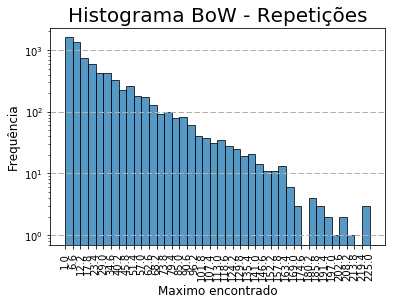

[  1.59600000e+03   1.37200000e+03   7.35000000e+02   5.94000000e+02
   4.27000000e+02   4.28000000e+02   3.30000000e+02   2.21000000e+02
   2.59000000e+02   1.82000000e+02   1.74000000e+02   1.28000000e+02
   9.10000000e+01   9.90000000e+01   7.80000000e+01   8.30000000e+01
   6.00000000e+01   4.00000000e+01   3.80000000e+01   3.10000000e+01
   3.50000000e+01   2.80000000e+01   2.50000000e+01   1.90000000e+01
   2.10000000e+01   1.40000000e+01   1.10000000e+01   1.10000000e+01
   1.30000000e+01   6.00000000e+00   3.00000000e+00   0.00000000e+00
   4.00000000e+00   3.00000000e+00   2.00000000e+00   1.00000000e+00
   2.00000000e+00   1.00000000e+00   0.00000000e+00   3.00000000e+00] [   1.     6.6   12.2   17.8   23.4   29.    34.6   40.2   45.8   51.4
   57.    62.6   68.2   73.8   79.4   85.    90.6   96.2  101.8  107.4
  113.   118.6  124.2  129.8  135.4  141.   146.6  152.2  157.8  163.4
  169.   174.6  180.2  185.8  191.4  197.   202.6  208.2  213.8  219.4
  225. ]


In [174]:
make_histogram(sorted_values, verbose = 1)

### Removendo colunas baseado na frequência

In [165]:
def remove_low_counting_tokens(dataset, sorted_columns, sorted_values, bounds=[65,4,18,24]):
    drop_columns = []
    not_sure_to_drop = []
    report = []
    
    for index, s in enumerate(sorted_columns):
        count_raw = np.array(dataset.loc[:, s])
        non_zeros = [t for t in count_raw if t != 0]
        median = np.median(count_raw)
        mean = np.mean(count_raw)
        
        # Check if the feature has a high frequency among at least 80% of the samples
        if sorted_values[index] < bounds[0] and len(non_zeros) >= (0.8 * dataset.shape[0]):
            drop_colum = (s, sorted_values[index], median, len(non_zeros))
            report.append(drop_colum)
            drop_columns.append(s)
        # Check if the column is constant throughout at least 60% of the samples
        elif abs(median - mean) <= bounds[1] and len(non_zeros) >= (0.6 * dataset.shape[0]):
            drop_colum = (s, sorted_values[index], median, len(non_zeros))
            report.append(drop_colum)
            drop_columns.append(s)
        # Drop if the max frequency is less than 18
        elif sorted_values[index] < bounds[2]:    
            drop_colum = (s, sorted_values[index], median, len(non_zeros))
            report.append(drop_colum)
            drop_columns.append(s)
        # Sent to check if the max frequency is higher than 18 and less than 24
        elif sorted_values[index] < bounds[3]:    
            drop_colum = (s, sorted_values[index], median, len(non_zeros))
            not_sure_to_drop.append(s)
        else:
            continue

    dataset = dataset.drop(drop_columns, axis=1)
    
    return (dataset, not_sure_to_drop, report, drop_columns)

In [166]:
X, columns_to_check, report, columns_droped = remove_low_counting_tokens(X, sorted_columns, sorted_values)
print(len(columns_droped), len(columns_to_check))
print(X.shape)
X.head()

3853 585
(5811, 3315)


,abbeel,abc,abs,absolute,absorbed,absorption,accelerate,accept,access,accompanied,...,workload,workspace,world,worst,write,writer,xing,yahoo,year,yellow
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [160]:
print(count_max_ocurrences(X))

(abbeel            21
abc               25
abs               21
absolute          25
absorbed          31
absorption        51
accelerate        66
accept            23
access            32
accompanied       48
accord            20
account           23
accumulate        39
accuracies        64
accurate          42
ace               26
acetylcholine     23
acid              36
acl               24
acoust            53
acquire           19
acquisition       39
across            35
acs               87
act               68
action           153
activate         114
actor             52
actual            25
adaboost          81
                ... 
width             76
wiener            41
wild              27
willshaw          23
win               37
wind              51
window           152
winner            68
winnow            46
winter            21
wire              60
wis               41
wise              34
wishart           32
within            21
witness           40
wolf        

## Remodelando em um passo

In [175]:
y = dataset.iloc[:, 0]
X = dataset.copy()
X = X.drop('Unnamed: 0', axis=1)

t0 = time()

X = remove_repeated_tokens(X, repeated_tokens)
max_feature_counts, sorted_values, sorted_columns = count_max_ocurrences(X)
X, columns_to_check, report, columns_droped = remove_low_counting_tokens(X, sorted_columns, sorted_values)


print('New Dimensions: {}'.format(X.shape))
print('Execution time %.3fs' % (time() - t0))

New Dimensions: (5811, 3315)
Execution time 19.374s


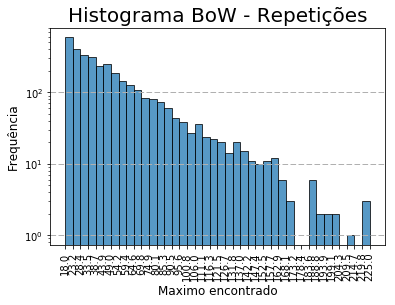

In [176]:
max_feature_counts, sorted_values, sorted_columns = count_max_ocurrences(X)
make_histogram(sorted_values)

## Salvando novo dataset remodelado

In [186]:
new_X = X.assign(y=pd.Series(y).values)
new_X.to_csv('NIPS_1987-2015_remodeled.csv')

# Clustering

In [189]:
new_X = pd.read_csv('NIPS_1987-2015_remodeled.csv')
y = new_X.loc[:, 'y']
new_X = new_X.drop('y', axis=1)

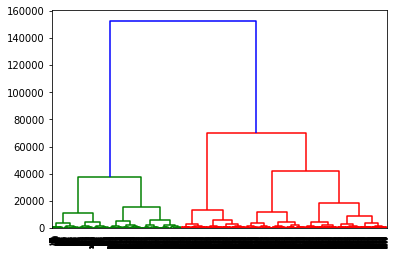

In [190]:
import scipy.cluster.hierarchy as sch

ded = sch.dendrogram(sch.linkage(new_X, method = 'ward'))
plt.show()

Foi 20
Foi 21
Foi 22
Foi 23
Foi 24
Foi 25
Foi 26
Foi 27
Foi 28
Foi 29
Foi 30
Foi 31
Foi 32
Foi 33
Foi 34
Foi 35
Foi 36
Foi 37
Foi 38
Foi 39


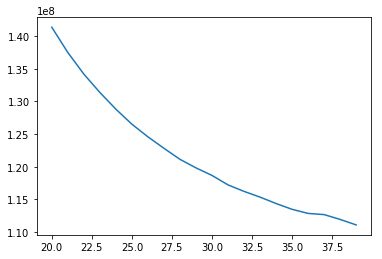

In [191]:
from sklearn.cluster import KMeans
wcss = []

for i in range(20, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(new_X)
    wcss.append(kmeans.inertia_)
    print('Foi', i)
    
plt.plot(range(20,40), wcss)
plt.show()

In [192]:

for i in range(41, 80):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(new_X)
    wcss.append(kmeans.inertia_)
    print('Foi', i)
    
plt.plot(range(41, 80), wcss)
plt.show()

Foi 41
Foi 42
Foi 43
Foi 44
Foi 45
Foi 46
Foi 47
Foi 48
Foi 49
Foi 50
Foi 51
Foi 52
Foi 53
Foi 54
Foi 55
Foi 56
Foi 57
Foi 58
Foi 59
Foi 60
Foi 61
Foi 62
Foi 63
Foi 64
Foi 65
Foi 66
Foi 67
Foi 68
Foi 69
Foi 70
Foi 71
Foi 72
Foi 73
Foi 74
Foi 75
Foi 76
Foi 77
Foi 78
Foi 79


ValueError: x and y must have same first dimension, but have shapes (39,) and (59,)

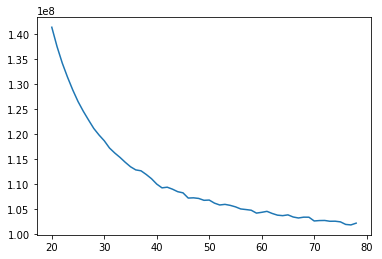

In [196]:
plt.plot(range(20, 79), wcss)
plt.show()